In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import requests.auth
import json
import datetime
from bs4 import BeautifulSoup
import re
# https://www.census.gov/geographies/reference-files/2010/geo/state-area.html
# https://www.statista.com/statistics/183588/population-density-in-the-federal-states-of-the-us/

In [3]:
df=pd.read_csv("us-states.csv")
df.loc[:,'day']=df['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%d'))
df.loc[:,'month']=df['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%m'))
df.loc[:,'year']=df['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%y'))
df=df[['date','state','cases','deaths','day','month','year']]

In [4]:
df21=df[df['year']=='21']

In [5]:
df21=df21.groupby('state')[['date','cases','deaths','day','month','year']].agg('last').reset_index()
lastdate=datetime.datetime.strptime(df21.iloc[0]['date'],'%Y-%m-%d').strftime('%B %d')

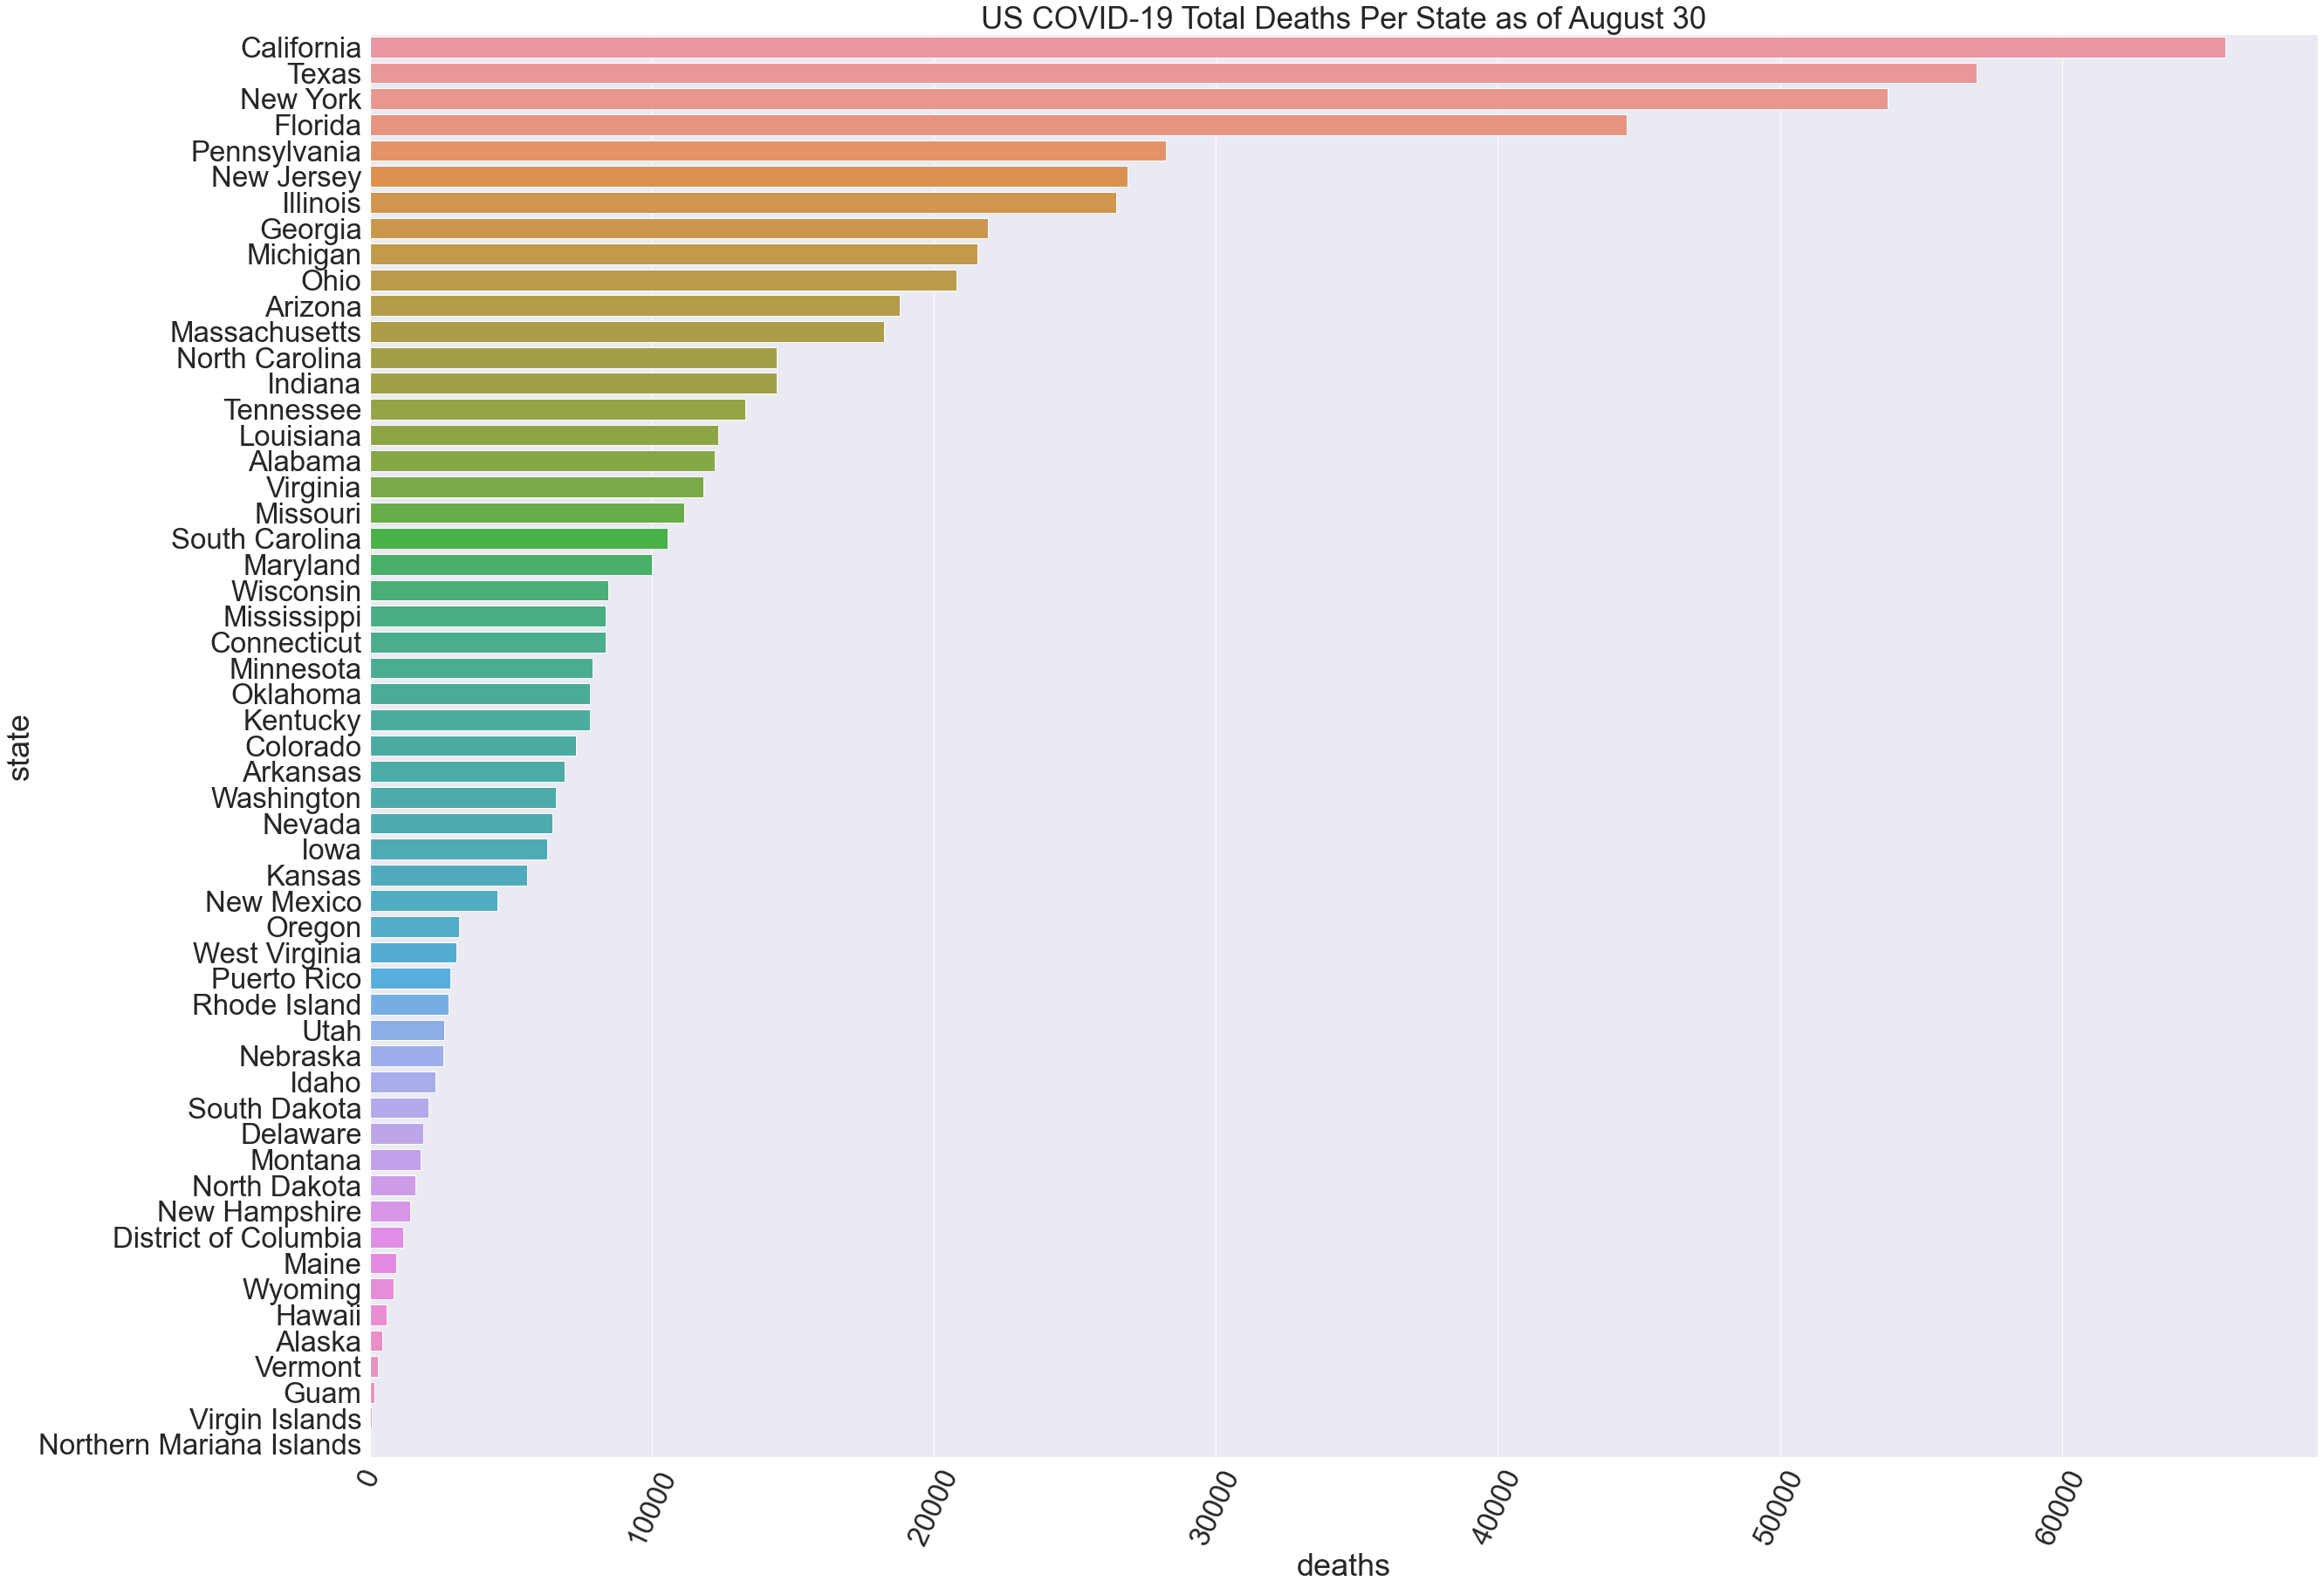

In [6]:
sns.set(font_scale=3)
plt.figure(figsize=(40,30))
x=sns.barplot(data=df21.sort_values(by='deaths',ascending=False),y='state',x='deaths',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title("US COVID-19 Total Deaths Per State as of "+lastdate,fontsize=35);
#plt.savefig("US_totalcoviddeaths.png")

In [9]:
pop=pd.read_csv('nst-est2020.csv')
pop2=pd.read_csv('nst-est2020.csv')

In [8]:
pop.columns=['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'CENSUS2010POP',
       'ESTIMATESBASE2010', '2010', '2011',
       '2012', '2013', '2014',
       '2015', '2016', '2017',
       '2018', '2019', '042020',
       'POP2020']
pop=pop[['NAME','POP2020']]

In [9]:
pop=pop.iloc[[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,
             28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,56,44,45,46,47,48,49,
             50,51,52,53,54,55]].reset_index().drop(labels='index',axis=1)

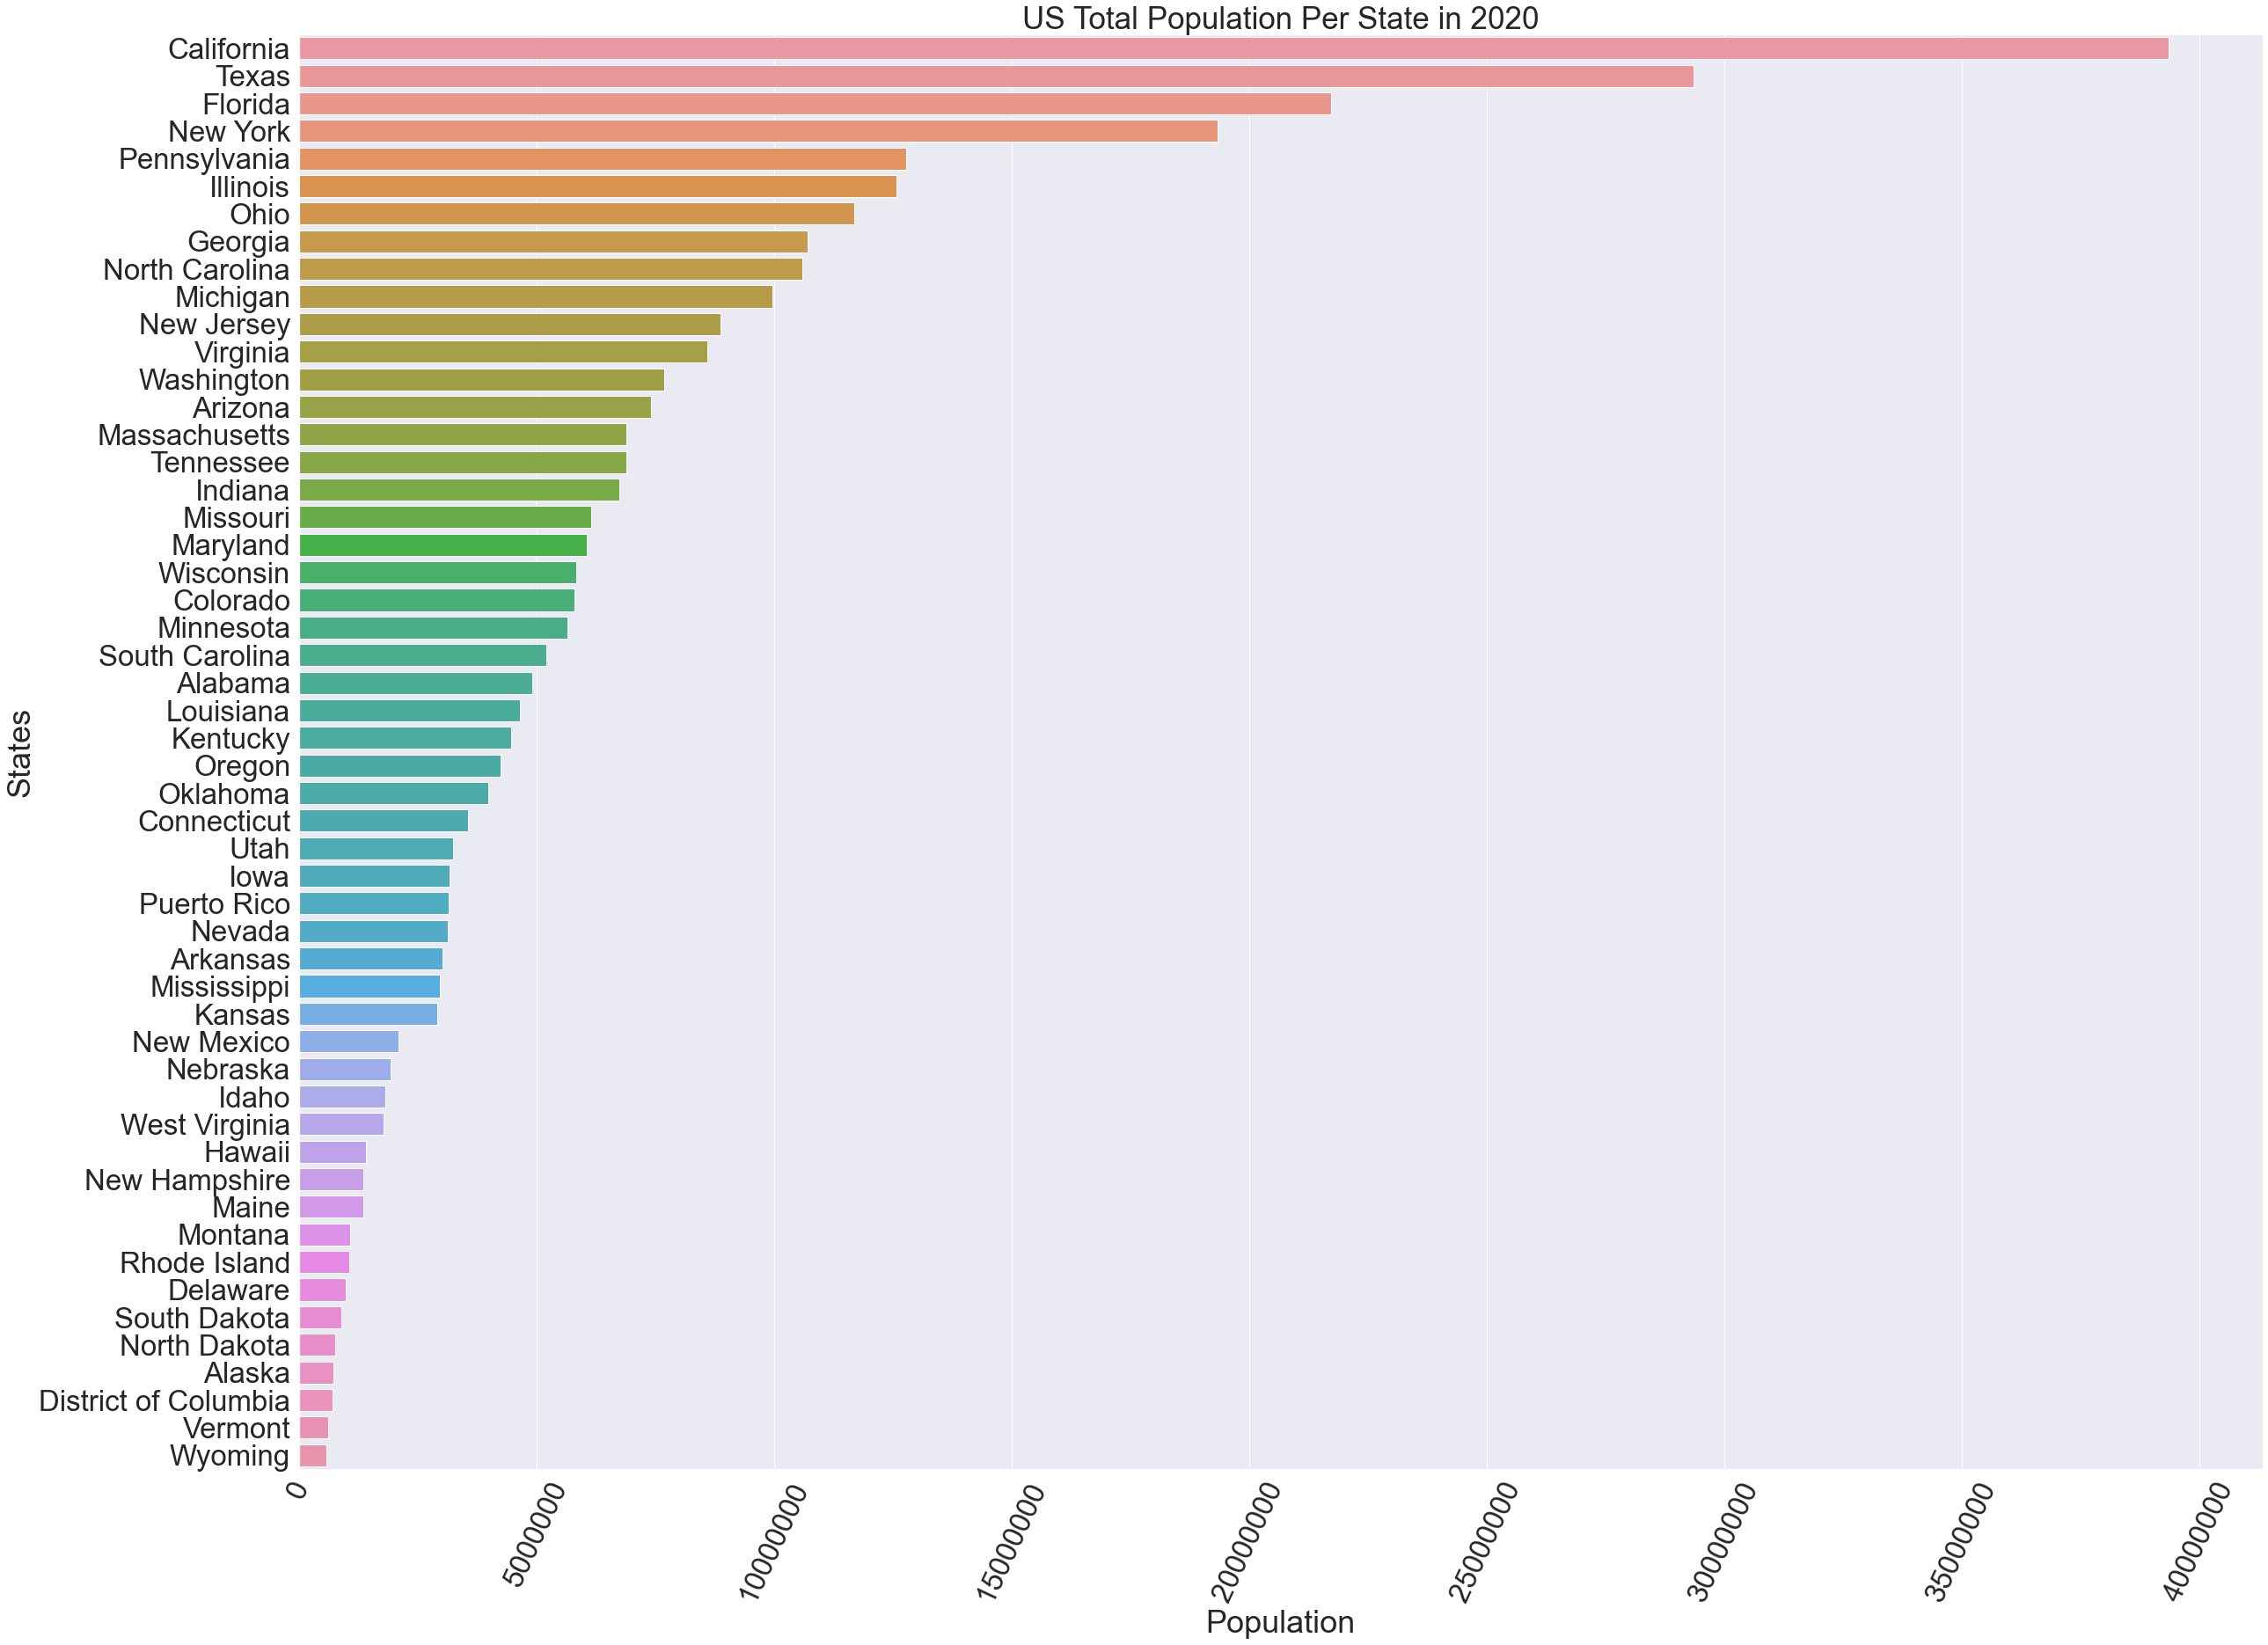

In [10]:
sns.set(font_scale=3)
plt.figure(figsize=(40,30))
x=sns.barplot(data=pop.sort_values(by='POP2020',ascending=False),y='NAME',x='POP2020',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title("US Total Population Per State in 2020",fontsize=35)
x.ticklabel_format(style='plain', axis='x')
x.set_xlabel("Population")
x.set_ylabel("States");
#x.set_xticks(range(len(pop)));
#x.set_xticklabels(['May','June','July','August','September','October','November','December',"January '21"])
#x.set_xticklabels(['February','March','April','May','June','July'])
#plt.savefig("monthlycoviddeaths_pgcounty21.png",bbox_inches='tight');
#plt.legend(loc = 2, bbox_to_anchor = (1,1));

In [10]:
# CDC vaccination info by state
CDCURL="https://data.cdc.gov/resource/unsk-b7fc.json"
CDCdata=requests.get(CDCURL)

In [11]:
statesvaxx=pd.DataFrame.from_records(data=CDCdata.json())

In [12]:
statesvaxx=statesvaxx[['date','location','series_complete_yes']]
statesvaxx.columns=['date','location','fully_vaccinated']
statesvaxx.loc[:,'date']=statesvaxx['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.000').strftime('%Y-%m-%d'))
statesvaxx.loc[:,'day']=statesvaxx['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%d'))

In [13]:
statesvaxx=statesvaxx.groupby('location')['fully_vaccinated'].agg('last').reset_index()
statesvaxx=statesvaxx[(statesvaxx['location']!='AS') & 
                      (statesvaxx['location']!='BP2') & (statesvaxx['location']!='DD2') &
                      (statesvaxx['location']!='FM') & (statesvaxx['location']!='GU') &
                      (statesvaxx['location']!='IH2') & (statesvaxx['location']!='LTC') &
                      (statesvaxx['location']!='MP') & (statesvaxx['location']!='RP') &
                      (statesvaxx['location']!='US') & (statesvaxx['location']!='VA2') &
                      (statesvaxx['location']!='VI')].reset_index().drop(labels='index',axis=1)
pop2.columns=['SUMLEV', 'REGION', 'DIVISION', 'state', 'name', 'CENSUS2010POP',
       'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011',
       'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014',
       'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017',
       'POPESTIMATE2018', 'POPESTIMATE2019', 'POPESTIMATE042020',
       'pop2020']

In [14]:
pop2=pop2[['name','pop2020']].iloc[[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                                 31,32,33,34,35,36,37,38,39,40,41,42,43,56,44,45,46,47,48,49,50,
                                 51,52,53,54,55]].reset_index().drop(labels='index',axis=1)
pop2=pop2.iloc[[1,0,3,2,4,5,6,8,7,9,10,11,15,12,13,14,16,17,18,21,20,19,22,23,25,24,26,
             33,34,27,29,30,31,28,32,35,36,37,38,39,40,41,42,43,44,45,47,46,48,50,49,51]].reset_index().drop(labels='index',axis=1)

In [ ]:
statesvaxx=statesvaxx.drop([22]).reset_index().drop(labels='index',axis=1)
popvaxxed=pd.concat([statesvaxx,pop2],axis=1)
popvaxxed.columns=['abbr','fully_vaccinated','full_name','curr_pop']
popvaxxed.loc[:,'percent']=round((popvaxxed['fully_vaccinated'].astype('int64')/popvaxxed['curr_pop'])*100,2)
totalvaxx=popvaxxed['fully_vaccinated'].astype('int64').sum()/popvaxxed['curr_pop'].sum()
popvaxxed

In [18]:
abbr = popvaxxed[['abbr','full_name']]
abbr.to_csv("abbr.csv",index=False)

The United States is %50.31 vaccinated.


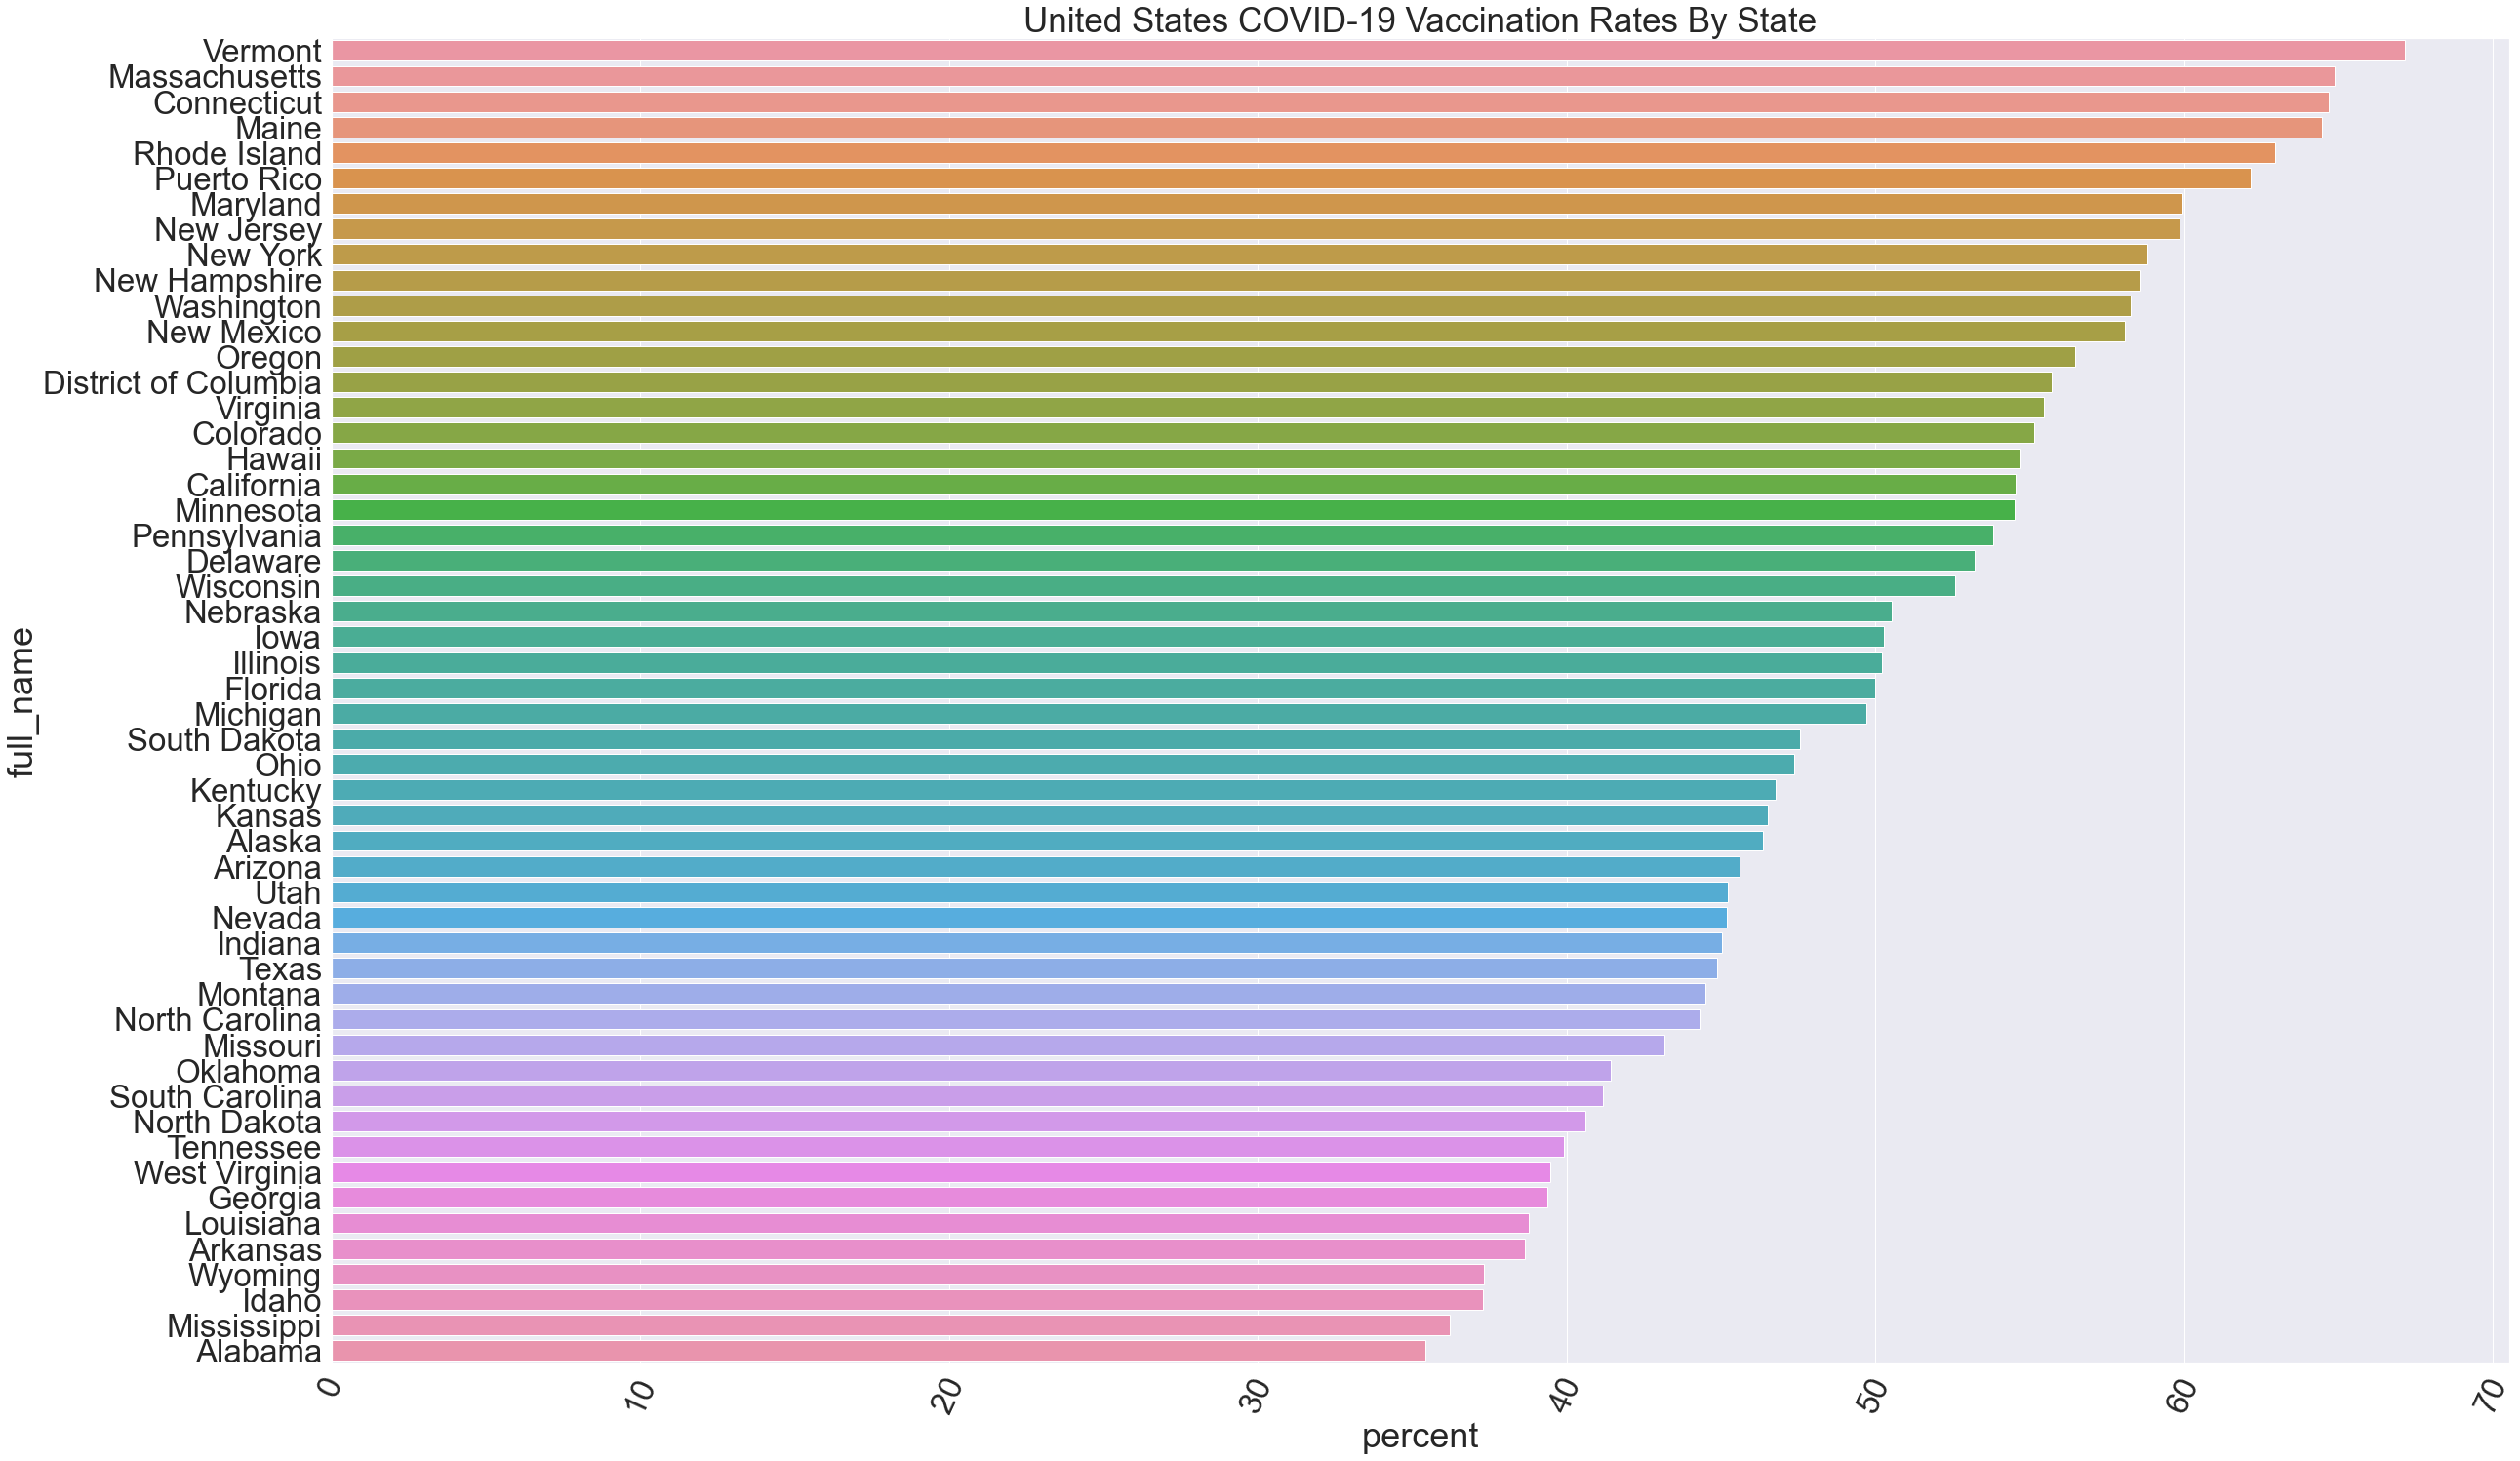

In [17]:
sns.set(font_scale=3)
plt.figure(figsize=(40,25))
x=sns.barplot(data=popvaxxed.sort_values(by='percent',ascending=False),x='percent',y='full_name',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title("United States COVID-19 Vaccination Rates By State",fontsize=35)
print("The United States is %"+str(round(totalvaxx*100, 2))+" vaccinated.");

In [18]:
pop.columns=['state','POP2020']
both21=df.merge(pop)

In [19]:
both21=both21.groupby('state')[['cases','deaths','month','year','POP2020']].agg('last').reset_index()
both21.loc[:,'case_fatality']=round((both21['deaths']/both21['cases'])*100,3)
both21.loc[:,'incidence_rate']=round((both21['cases']/both21['POP2020'])*100000,3)

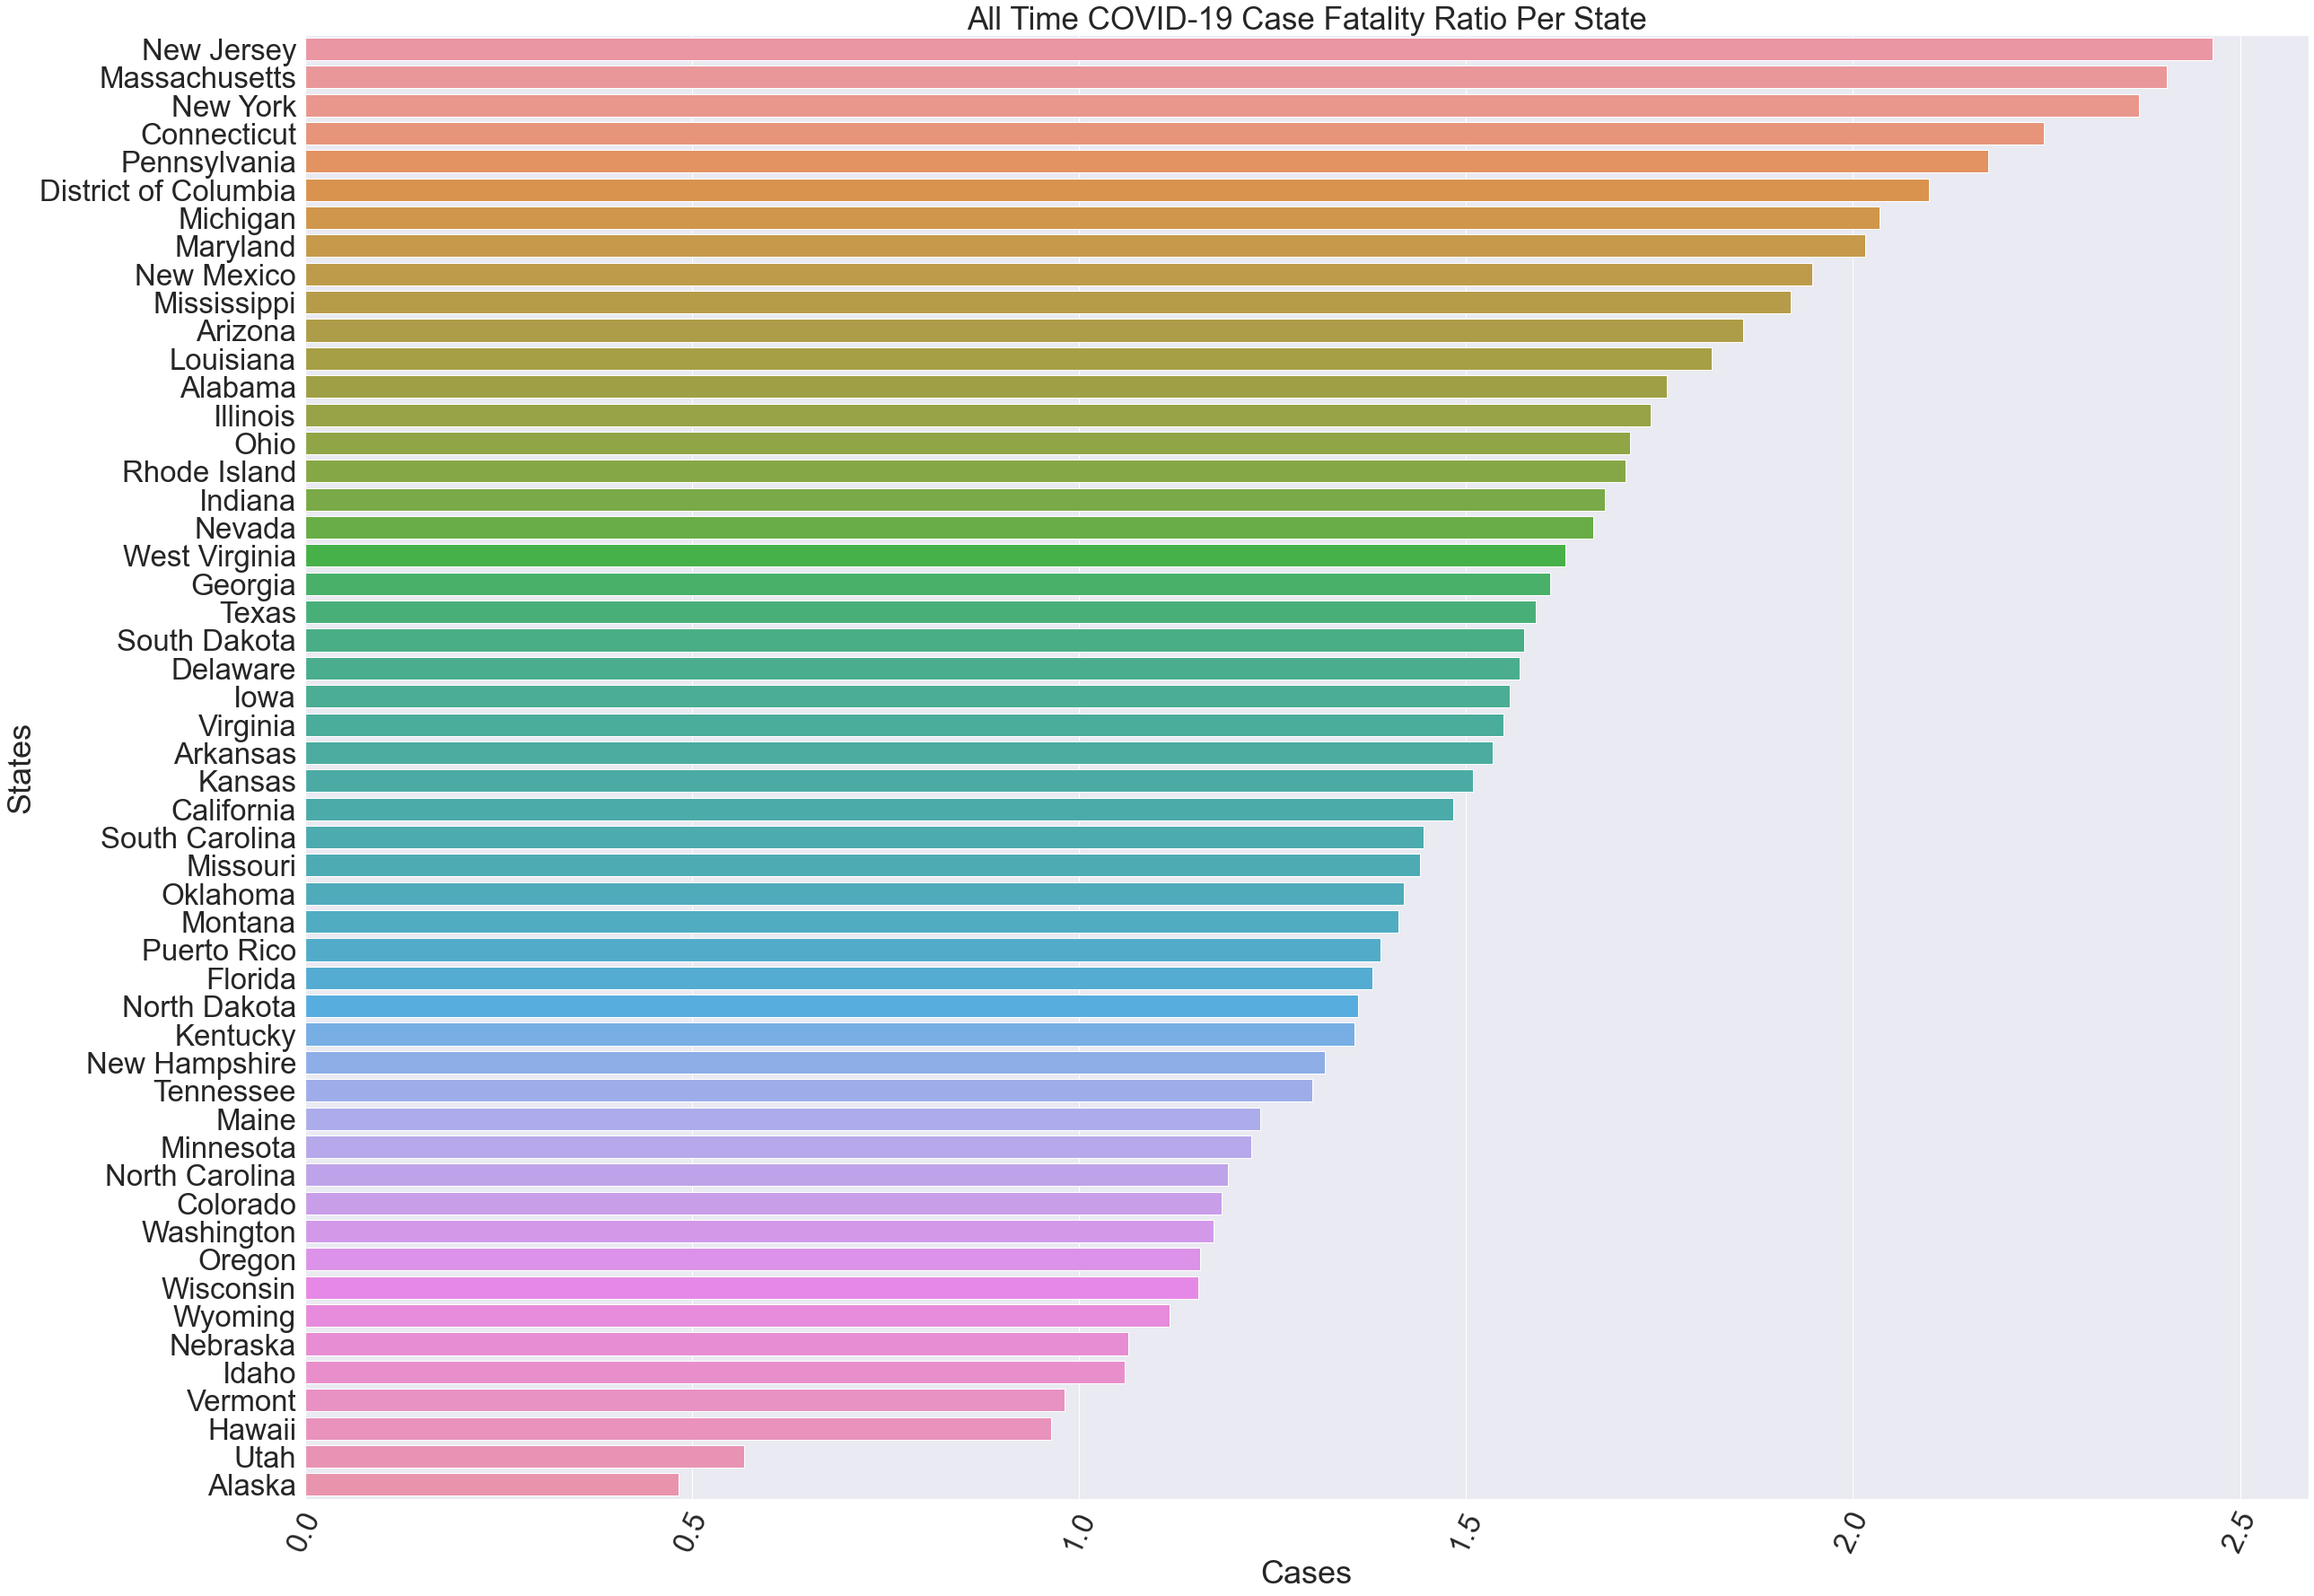

In [20]:
sns.set(font_scale=3)
plt.figure(figsize=(40,30))
x=sns.barplot(data=both21.sort_values(by='case_fatality',ascending=False),y='state',x='case_fatality',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title("All Time COVID-19 Case Fatality Ratio Per State",fontsize=35);
x.ticklabel_format(style='plain', axis='x')
x.set_xlabel("Cases")
x.set_ylabel("States");
#plt.savefig("UStotal_presentcases_"+both21.loc[0]['date']+".png");

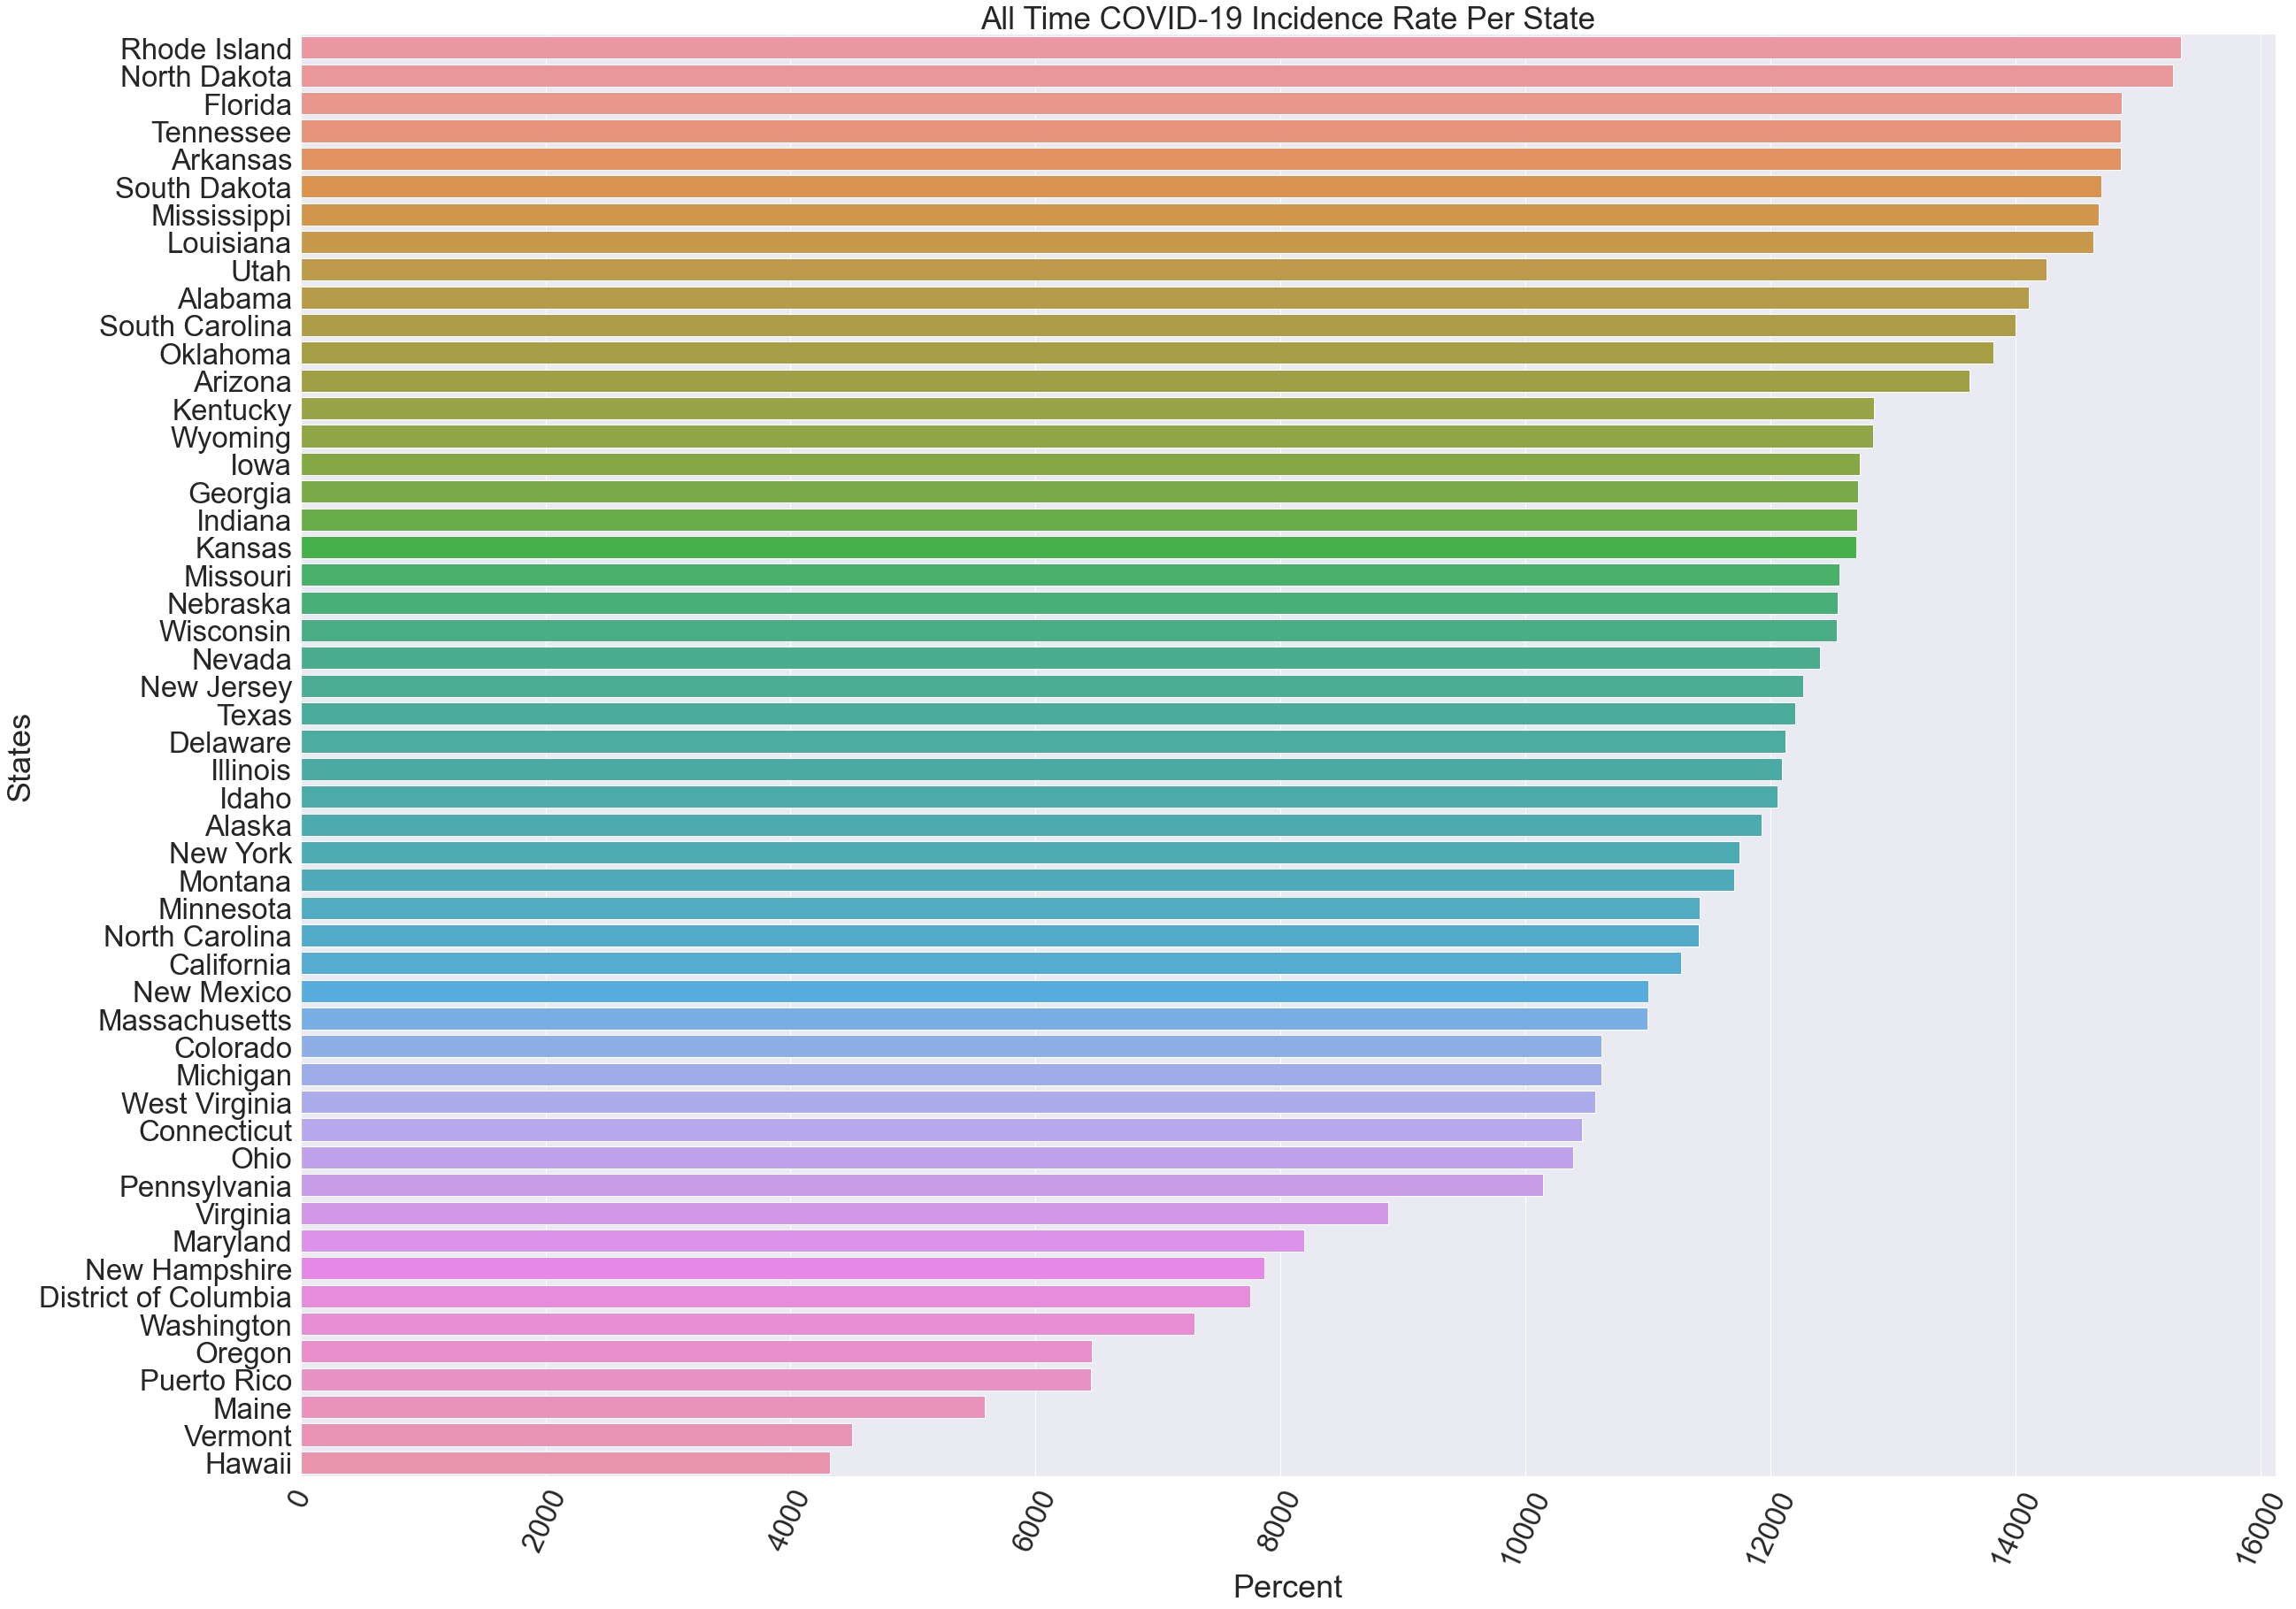

In [21]:
sns.set(font_scale=3)
plt.figure(figsize=(40,30))
x=sns.barplot(data=both21.sort_values(by='incidence_rate',ascending=False),y='state',x='incidence_rate',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title("All Time COVID-19 Incidence Rate Per State",fontsize=35);
#x.ticklabel_format(style='plain', axis='x')
x.set_xlabel("Percent")
x.set_ylabel("States");
#plt.savefig("UStotal_presentCFR_"+both21.loc[0]['date']+".png");

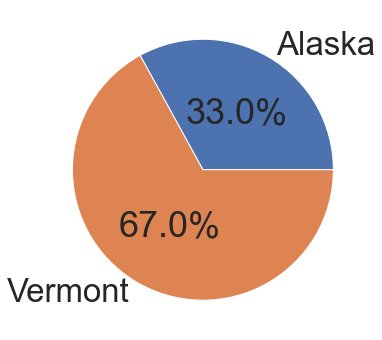

In [22]:
labels = both21.iloc[[1,46]]['state']
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=both21.iloc[[1,46]]['case_fatality'], autopct="%.1f%%", labels=labels, pctdistance=0.5);
#plt.title("Relationship to Victims of "+crimes.upper()+" in 2019", fontsize=14);
#plt.savefig(crimes+"_2019_"+words+".png")
#plt.close();

In [23]:
# https://www.statista.com/statistics/183588/population-density-in-the-federal-states-of-the-us/
state_sqmi=pd.read_csv("states-sqmi20.csv")
#state_sqmi

In [24]:
popvaxxed

abbr fully_vaccinated             full_name  curr_pop  percent
0    AK           338872                Alaska    731158    46.35
1    AL          1743610               Alabama   4921532    35.43
2    AR          1170974              Arkansas   3030522    38.64
3    AZ          3385335               Arizona   7421401    45.62
4    CA         21479164            California  39368078    54.56
5    CO          3203826              Colorado   5807719    55.16
6    CT          2300866           Connecticut   3557006    64.69
7    DC           397089  District of Columbia    712816    55.71
8    DE           525051              Delaware    986809    53.21
9    FL         10863504               Florida  21733312    49.99
10   GA          4218980               Georgia  10710017    39.39
11   HI           769575                Hawaii   1407006    54.70
12   IA          1590661                  Iowa   3163561    50.28
13   ID           681540                 Idaho   1826913    37.31
14   IL          6322093              Illinois  12587530    50.23
15   IN          3042425               Indiana   6754953    45.04
16   KS          1355295                Kansas   2913805    46.51
17   KY          2094475              Kentucky   4477251    46.78
18   LA          1801301             Louisiana   4645318    38.78
19   MA          4473466         Massachusetts   6893574    64.89
20   MD          3629961              Maryland   6055802    59.94
21   ME           870343                 Maine   1350141    64.46
22   MI          4953700              Michigan   9966555    49.70
23   MN          3084154             Minnesota   5657342    54.52
24   MO          2655248              Missouri   6151548    43.16
25   MS          1074309           Mississippi   2966786    36.21
26   MT           480817               Montana   1080577    44.50
27   NC          4700282        North Carolina  10600823    44.34
28   ND           310712          North Dakota    765309    40.60
29   NE           979312              Nebraska   1937552    50.54
30   NH           800560         New Hampshire   1366275    58.59
31   NJ          5316248            New Jersey   8882371    59.85
32   NM          1223383            New Mexico   2106319    58.08
33   NV          1418246                Nevada   3138259    45.19
34   NY         11374254              New York  19336776    58.82
35   OH          5539574                  Ohio  11693217    47.37
36   OK          1650107              Oklahoma   3980783    41.45
37   OR          2395446                Oregon   4241507    56.48
38   PA          6880507          Pennsylvania  12783254    53.82
39   PR          1963871           Puerto Rico   3159343    62.16
40   RI           665619          Rhode Island   1057125    62.97
41   SC          2149335        South Carolina   5218040    41.19
42   SD           424575          South Dakota    892717    47.56
43   TN          2748390             Tennessee   6886834    39.91
44   TX         13179043                 Texas  29360759    44.89
45   UT          1469772                  Utah   3249879    45.23
46   VA          4766294              Virginia   8590563    55.48
47   VT           418708               Vermont    623347    67.17
48   WA          4484046            Washington   7693612    58.28
49   WI          3068121             Wisconsin   5832655    52.60
50   WV           704541         West Virginia   1784787    39.47
51   WY           217399               Wyoming    582328    37.33

In [25]:
# CURRENT MONTHLY STATS
df=pd.read_csv("us-states.csv")
df.loc[:,'day']=df['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%d'))
df.loc[:,'month']=df['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%m'))
df.loc[:,'year']=df['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%y'))
df=df[['date','state','cases','deaths','day','month','year']]
df['day']=df['day'].astype('int64')
df['month']=df['month'].astype('int64')
df['year']=df['year'].astype('int64')
df=df.merge(pop)

jan20=df[(df['year']==20) & (df['month']==1)]['state'].unique().tolist()
feb20=df[(df['year']==20) & (df['month']==2)]['state'].unique().tolist()

state='Maryland'
curr=8
curryear=21
lastmo=7
lastyear=21
current=df[(df['month']==curr) & (df['year']==curryear)]

if lastyear==20 and curryear==21:
    lastmonth=df[(df['month']==lastmo) & (df['year']==lastyear)]#.groupby('state')[['date','cases','deaths','month','year']].agg('last').reset_index()
    one=df[(df['month']>=lastmo+1) & (df['year']==lastyear)]
    two=df[(df['month']<=curr) & (df['year']==curryear)]
    current=pd.concat([one,two]).reset_index(drop=True)
elif lastmo==1 and lastyear==21:
    mo=12
    years=20
    lastmonth=df[(df['month']>=mo) & (df['year']==years)]#.groupby('state')[['date','cases','deaths','month','year']].agg('last').reset_index()
    current=df[(df['month']>=lastmo) & (df['month']<=curr) & (df['year']==curryear)]
elif lastmo==1 and lastyear==20:
    if state in jan20:
        lastmonth=df[(df['month']==1) & (df['day']>=26) & (df['year']==lastyear)]#.groupby('state')[['date','cases','deaths','month','year']].agg('last').reset_index()
        current=df[(df['month']>=2) & (df['month']<=curr) & (df['year']==curryear)]
    elif state in feb20:
        lastmonth=df[(df['month']==2) & (df['day']>=28) & (df['year']==lastyear)]#.groupby('state')[['date','cases','deaths','month','year']].agg('last').reset_index()
        current=df[(df['month']>=3) & (df['month']<=curr) & (df['year']==curryear)]
    else:
        lastmonth=df[(df['month']==3) & (df['day']>=17) & (df['year']==lastyear)]#.groupby('state')[['date','cases','deaths','month','year']].agg('last').reset_index()
        current=df[(df['month']>=4) & (df['month']<=curr) & (df['year']==curryear)]
else:
    if abs(curr-lastmo)>=2:
        lastmonth=df[(df['month']==lastmo) & (df['year']==lastyear)]#.groupby('state')[['date','cases','deaths','month','year']].agg('last').reset_index()
        current=df[(df['month']>=lastmo+1) & (df['month']<=curr) & (df['year']==curryear)]
    else:
        lastmonth=df[(df['month']==lastmo) & (df['year']==lastyear)]#.groupby('state')[['date','cases','deaths','month','year']].agg('last').reset_index()

allstates=current['state'].unique().tolist()
caseslst=[]
deathlst=[]

In [26]:
for sts in allstates:
    laststat=lastmonth[lastmonth['state']==sts].reset_index(drop=True)
    statscurr=current[current['state']==sts].reset_index(drop=True)
    stats=pd.concat([laststat,statscurr]).reset_index(drop=True)
    count=0
    #months=stats['date']
    if sts==state:
        stsmonth=stats['date']
    data=stats
    col="cases"
    lst3=[]
    lst4=[]
    first=data[col][count]
    while count < len(data)-1:
        count+=1
        lst3.append(data[col][count]-data[col][count-1])
        deaths=data[col][count]-data[col][count-1]
        if len(lst3) == 1:
            if lst3[0] >= 0:
                lst4.append(lst3[0])
            else:
                lst4.append(-(lst3[0]))
            continue
        if deaths < 0:
            lst4.append(-(lst3[count-1]))
        else:
            lst4.append(lst3[count-1])
    lst4.insert(0,first)
    caseslst.append(lst4)
    
    count=0
    #months=stats['date']
    data=stats
    col="deaths"
    lst5=[]
    lst6=[]
    first=data[col][count]
    while count < len(data)-1:
        count+=1
        lst5.append(data[col][count]-data[col][count-1])
        deaths=data[col][count]-data[col][count-1]
        if len(lst5) == 1:
            if lst5[0] >= 0:
                lst6.append(lst5[0])
            else:
                lst6.append(-(lst5[0]))
            continue
        if deaths < 0:
            lst6.append(-(lst5[count-1]))
        else:
            lst6.append(lst5[count-1])
    lst6.insert(0,first)
    deathlst.append(lst6)

In [27]:
IRlst=[]
CFRlst=[]
avgCases=[]
avgDeaths=[]
totalCases=[]
totalDeaths=[]
eachstate=[]
casessts=[]
deathssts=[]

for things, things2, sts in zip(caseslst,deathlst,allstates):
    stats=current[current['state']==sts].reset_index(drop=True)
    IR=round((sum(things[1:])/stats['POP2020'].iloc[1])*100000,3)
    IRlst.append(IR)
    CFR=round((sum(things2[1:])/sum(things[1:]))*100,3)
    CFRlst.append(CFR)
    avgCases.append(round(sum(things[1:])/len(things[1:]),2))
    avgDeaths.append(round(sum(things2[1:])/len(things2[1:]),2))
    totalCases.append(sum(things[1:]))
    totalDeaths.append(sum(things2[1:]))
    eachstate.append(pd.DataFrame({'state':sts,'deaths':things2[1:],'cases':things[1:]}))
    casessts.append((sts,things[1:]))
    deathssts.append((sts,things2[1:]))

irDF=pd.DataFrame({'states':allstates,'IR':IRlst})
cfrDF=pd.DataFrame({'states':allstates,'CFR':CFRlst})
statsDF=pd.DataFrame({'states':allstates,'avg_cases':avgCases,'avg_deaths':avgDeaths,'total_cases':totalCases,'total_deaths':totalDeaths})
statsDF=statsDF.merge(popvaxxed[['full_name','curr_pop','percent']],left_on='states',right_on='full_name')
statsDF=statsDF.drop(columns='full_name')
firstdate=datetime.datetime.strptime(lastmonth.iloc[1]['date'],'%Y-%m-%d').strftime('%B %d')
seconddate=datetime.datetime.strptime(current.iloc[-1]['date'],'%Y-%m-%d').strftime('%B %d')
stsmonth=stsmonth.drop([0]).reset_index(drop=True)

In [28]:
for st, cs in casessts:
    if st==state:
        datesDF=pd.DataFrame({'dates':stsmonth,'cases':cs})
for st, ds in deathssts:
    if st==state:
        datesDF=datesDF.merge(pd.DataFrame({'dates':stsmonth,'deaths':ds}))

In [29]:
datesDF['deaths']

0      2
1      3
2      0
3      2
4      3
5      1
6      3
7      3
8      1
9      0
10     1
11     4
12     4
13     4
14     5
15     2
16     1
17     1
18     6
19     4
20     6
21     3
22     5
23     1
24     1
25     2
26     3
27     5
28     0
29     7
30     3
31     1
32     6
33     5
34     2
35     4
36     3
37     8
38     4
39     8
40     1
41     3
42     5
43     9
44     4
45     5
46     3
47     8
48     9
49     6
50    16
51     5
52     5
53     8
54    11
55     4
56     8
57    12
58    12
59     9
Name: deaths, dtype: int64

In [30]:
for num in pop['state'].tolist():
    if num==state:
        popstate=pop.sort_values(by='POP2020',ascending=False).reset_index(drop=True)
        x=popstate['state'].tolist().index(num)
        vaxxedorder=popvaxxed.sort_values(by='percent',ascending=False).reset_index(drop=True)
        pct=vaxxedorder['full_name'].tolist().index(num)
        ppsm=state_sqmi['states'].tolist().index(num)
        sqmiorder=state_sqmi.sort_values(by='sq_mi',ascending=False).reset_index(drop=True)
        sqmiNum=sqmiorder['states'].tolist().index(num)
        cfrDF=cfrDF.sort_values(by='CFR',ascending=False).reset_index(drop=True)
        cfrNum=cfrDF['states'].tolist().index(num)
        irDF=irDF.sort_values(by='IR',ascending=False).reset_index(drop=True)
        irNum=irDF['states'].tolist().index(num)
        totalpop=popstate.iloc[[x]]['POP2020'][x]
        both21=both21.sort_values(by='case_fatality',ascending=False).reset_index(drop=True)
        z=both21['state'].tolist().index(num)
        natrank1=both21['state'].tolist().index(num)
        cfr=both21.iloc[[z]]['case_fatality'][z]
        both21=both21.sort_values(by='incidence_rate',ascending=False).reset_index(drop=True)
        z=both21['state'].tolist().index(num)
        ir=both21.iloc[[z]]['incidence_rate'][z]
        natrank2=both21['state'].tolist().index(num)
        totcases=statsDF.sort_values(by='total_cases',ascending=False).reset_index(drop=True)
        totdeaths=statsDF.sort_values(by='total_deaths',ascending=False).reset_index(drop=True)
        casesNum=totcases['states'].tolist().index(num)
        deathsNum=totdeaths['states'].tolist().index(num)

        display("State of "+state)
        avgstats=statsDF.sort_values(by='avg_cases',ascending=False).reset_index(drop=True)
        statsNum=avgstats['states'].tolist().index(num)
        txt="Average of {:,} cases per day in "+str(round(datesDF.describe().iloc[0][0],2))+" days, currently ranked #"+str(statsNum+1)+" in the United States."                    
        display(txt.format(round(datesDF.describe().iloc[1][0],2),2))
        avgstats=statsDF.sort_values(by='avg_deaths',ascending=False).reset_index(drop=True)
        statsNum=avgstats['states'].tolist().index(num)
        txt="Average of {:,} deaths per day in "+str(round(datesDF.describe().iloc[0][0],2))+" days, currently ranked #"+str(statsNum+1)+" in the United States."
        display(txt.format(round(datesDF.describe().iloc[1][1],2)))

        display("Case Fatality Ratio from "+firstdate+" to "+seconddate+": "+str(cfrDF['CFR'].iloc[cfrNum])+"%, currently ranked #"+str(cfrNum+1)+" in the United States.")
        txt="Incidence Rate from "+firstdate+" to "+seconddate+": {:,} per 100k, currently ranked #"+str(irNum+1)+" in the United States."
        display(txt.format(irDF['IR'].iloc[irNum]))
        txt="There have been {:,} cases from "+firstdate+" To "+seconddate+", currently ranked #{} in the United States."
        display(txt.format(datesDF['cases'].sum(),casesNum+1))
        txt="There have been {:,} deaths from "+firstdate+" To "+seconddate+", currently ranked #{} in the United States."
        display(txt.format(datesDF['deaths'].sum(),deathsNum+1))
        
        display(state+" is "+str(vaxxedorder.iloc[pct]['percent'])+"% fully vaccinated, currently ranked #"+str(pct+1)+" in the United States.")
        txt="Total population: {:,}, ranked #"+str(x+1)+" in the United States."
        display(txt.format(totalpop))
        txt="There are {:,} people per square mile, ranked #"+str(ppsm+1)+" in the United States." 
        display(txt.format(state_sqmi.iloc[ppsm]['ppsm']))
        txt=state+" has {:,} total square miles, ranking #"+str(sqmiNum+1)+" in the United States."
        display(txt.format(sqmiorder.iloc[sqmiNum]['sq_mi']))
        display("All Time Case Fatality Ratio: "+str(cfr)+"%, currently ranked #"+str(natrank1+1)+" in the United States.")
        txt="All Time Incidence Rate: {:,} per 100k, currently ranked #"+str(natrank2+1)+" in the United States."
        display(txt.format(ir))
        display(round(datesDF.describe().T,2))

'State of Maryland'

'Average of 559.6 cases per day in 60.0 days, currently ranked #33 in the United States.'

'Average of 4.5 deaths per day in 60.0 days, currently ranked #31 in the United States.'

'Case Fatality Ratio from July 02 to August 30: 0.804%, currently ranked #11 in the United States.'

'Incidence Rate from July 02 to August 30: 554.443 per 100k, currently ranked #51 in the United States.'

'There have been 33,576 cases from July 02 To August 30, currently ranked #33 in the United States.'

'There have been 270 deaths from July 02 To August 30, currently ranked #31 in the United States.'

'Maryland is 59.94% fully vaccinated, currently ranked #7 in the United States.'

'Total population: 6,055,802, ranked #19 in the United States.'

'There are 623.99 people per square mile, ranked #6 in the United States.'

'Maryland has 12,406 total square miles, ranking #42 in the United States.'

'All Time Case Fatality Ratio: 2.016%, currently ranked #8 in the United States.'

'All Time Incidence Rate: 8,192.92 per 100k, currently ranked #44 in the United States.'

count   mean     std   min     25%    50%     75%     max
cases    60.0  559.6  409.71  38.0  163.75  515.5  900.25  1374.0
deaths   60.0    4.5    3.33   0.0    2.00    4.0    6.00    16.0

In [31]:
for stuff in eachstate:
    if stuff['state'].iloc[0]==state:
        deathsDF=pd.DataFrame({'dates':stsmonth,'deaths':stuff['deaths']})
        casesDF=pd.DataFrame({'dates':stsmonth,'cases':stuff['cases']})

In [32]:
len(stuff['deaths'])

60

In [33]:
# 340 for the whole pandemic
first=40
figsize=(first,20)

count  mean   std  min  25%  50%  75%   max
deaths   60.0   4.5  3.33  0.0  2.0  4.0  6.0  16.0

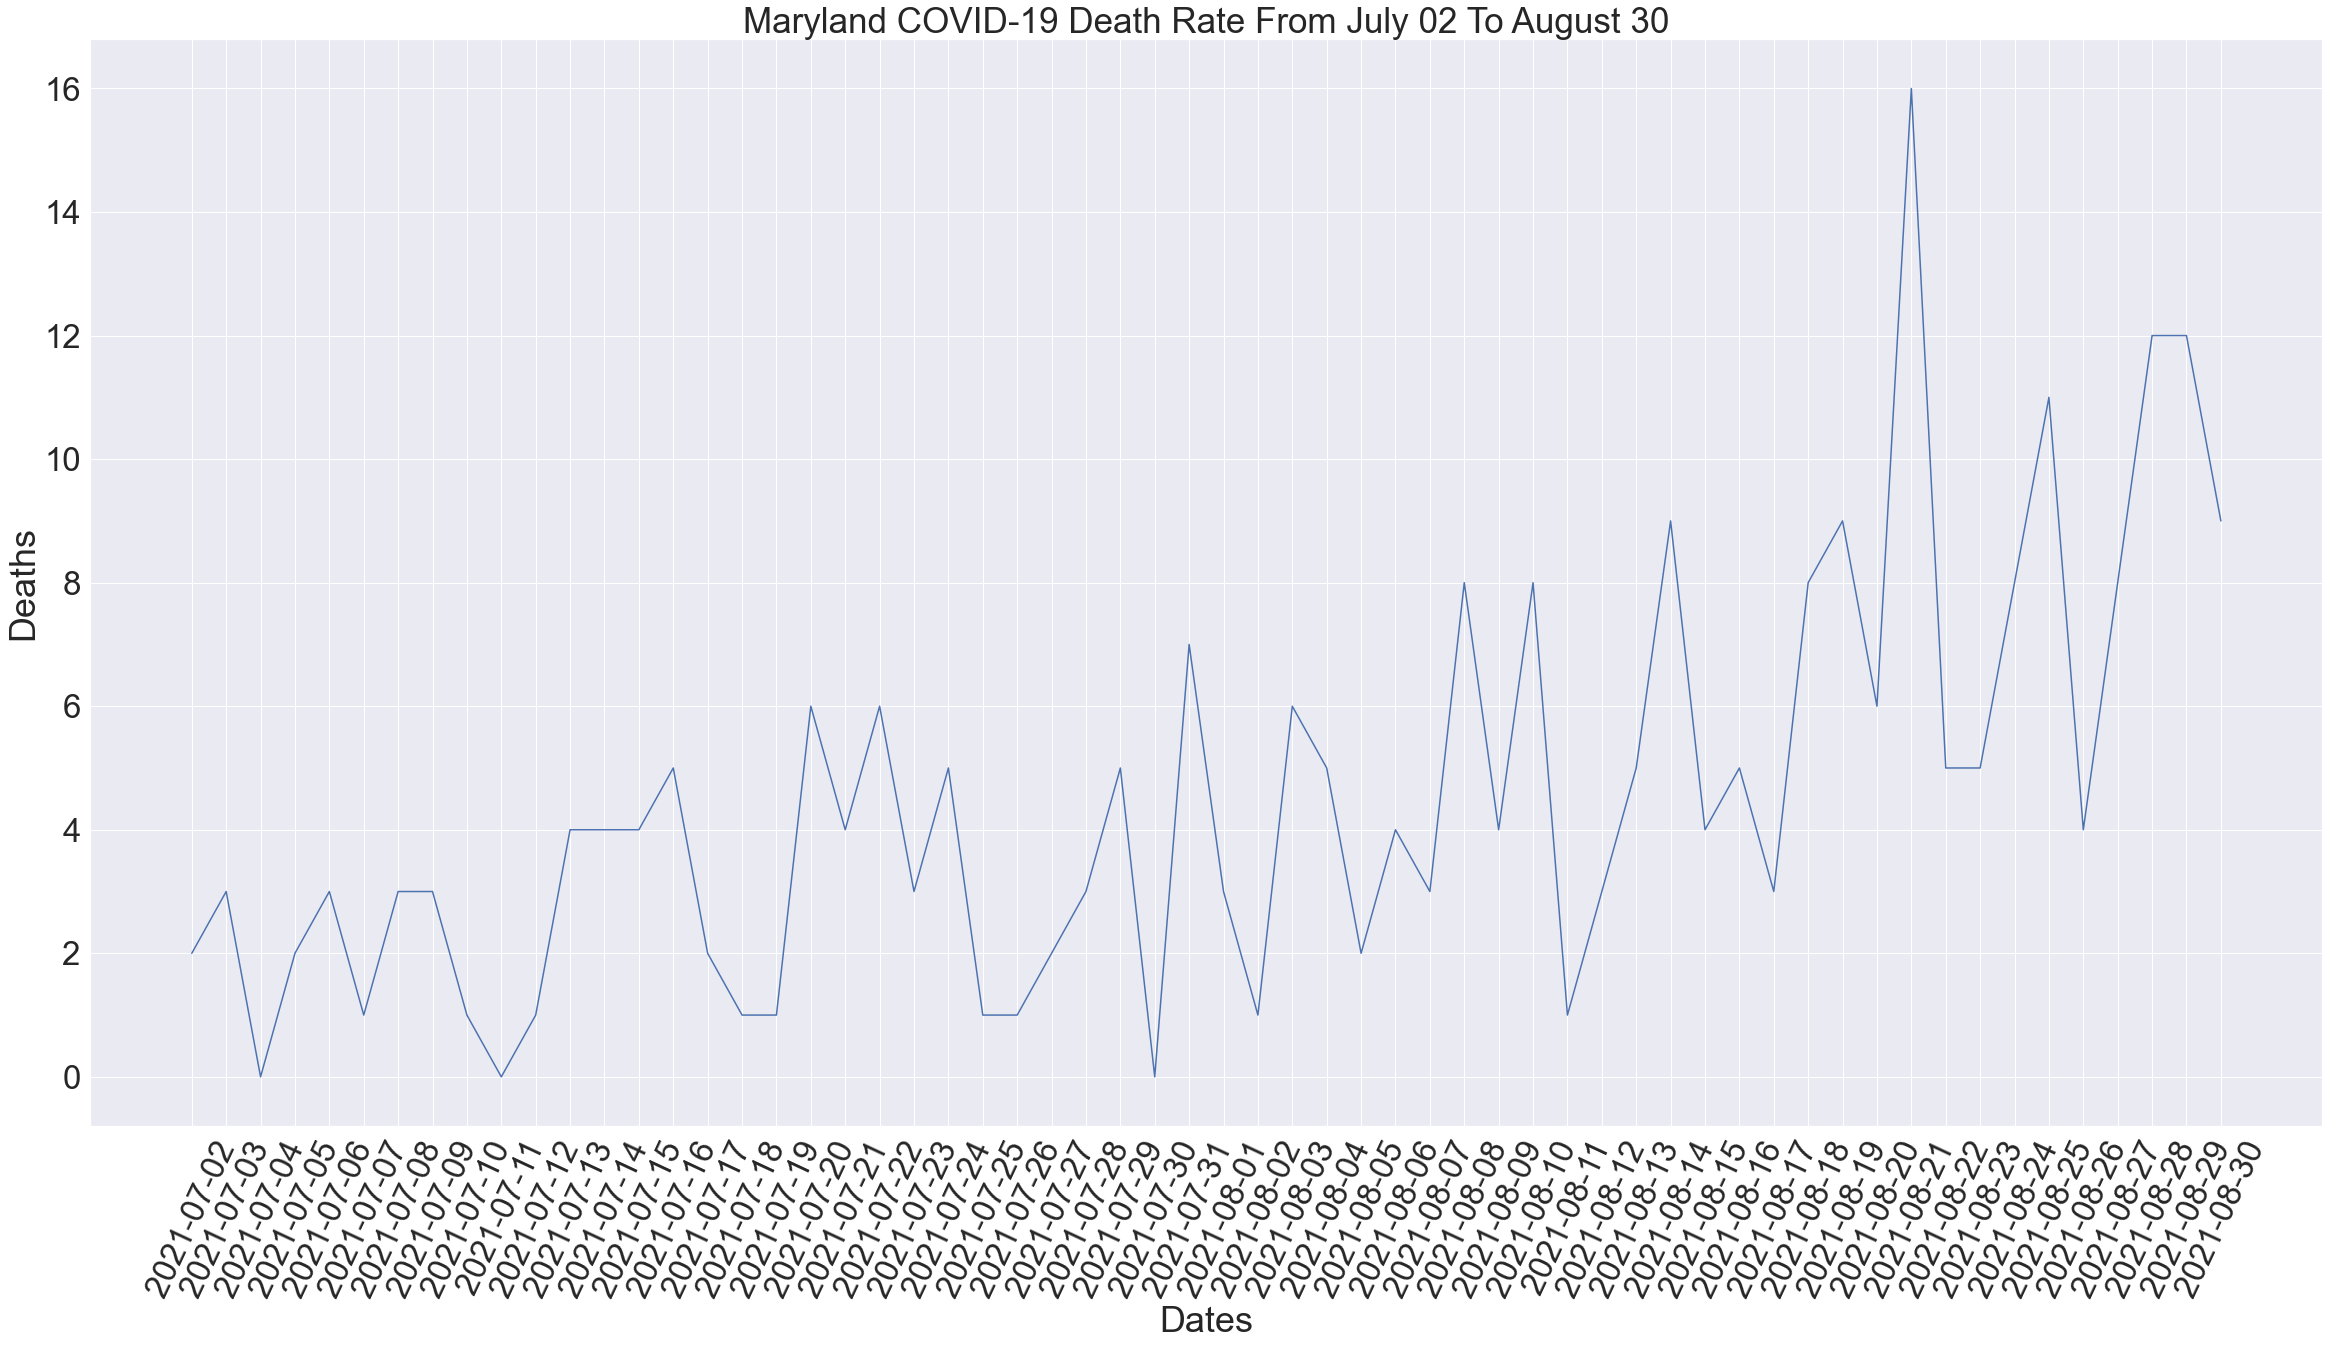

In [34]:
sns.set(font_scale=3)
plt.figure(figsize=figsize)
x=sns.lineplot(data=deathsDF,y='deaths',x='dates',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title(state+" COVID-19 Death Rate From "+firstdate+" To "+seconddate,fontsize=35);
#x.ticklabel_format(style='plain', axis='x')
x.set_xlabel("Dates")
x.set_ylabel("Deaths")
display(round(deathsDF.describe().T,2));

count   mean     std   min     25%    50%     75%     max
cases   60.0  559.6  409.71  38.0  163.75  515.5  900.25  1374.0

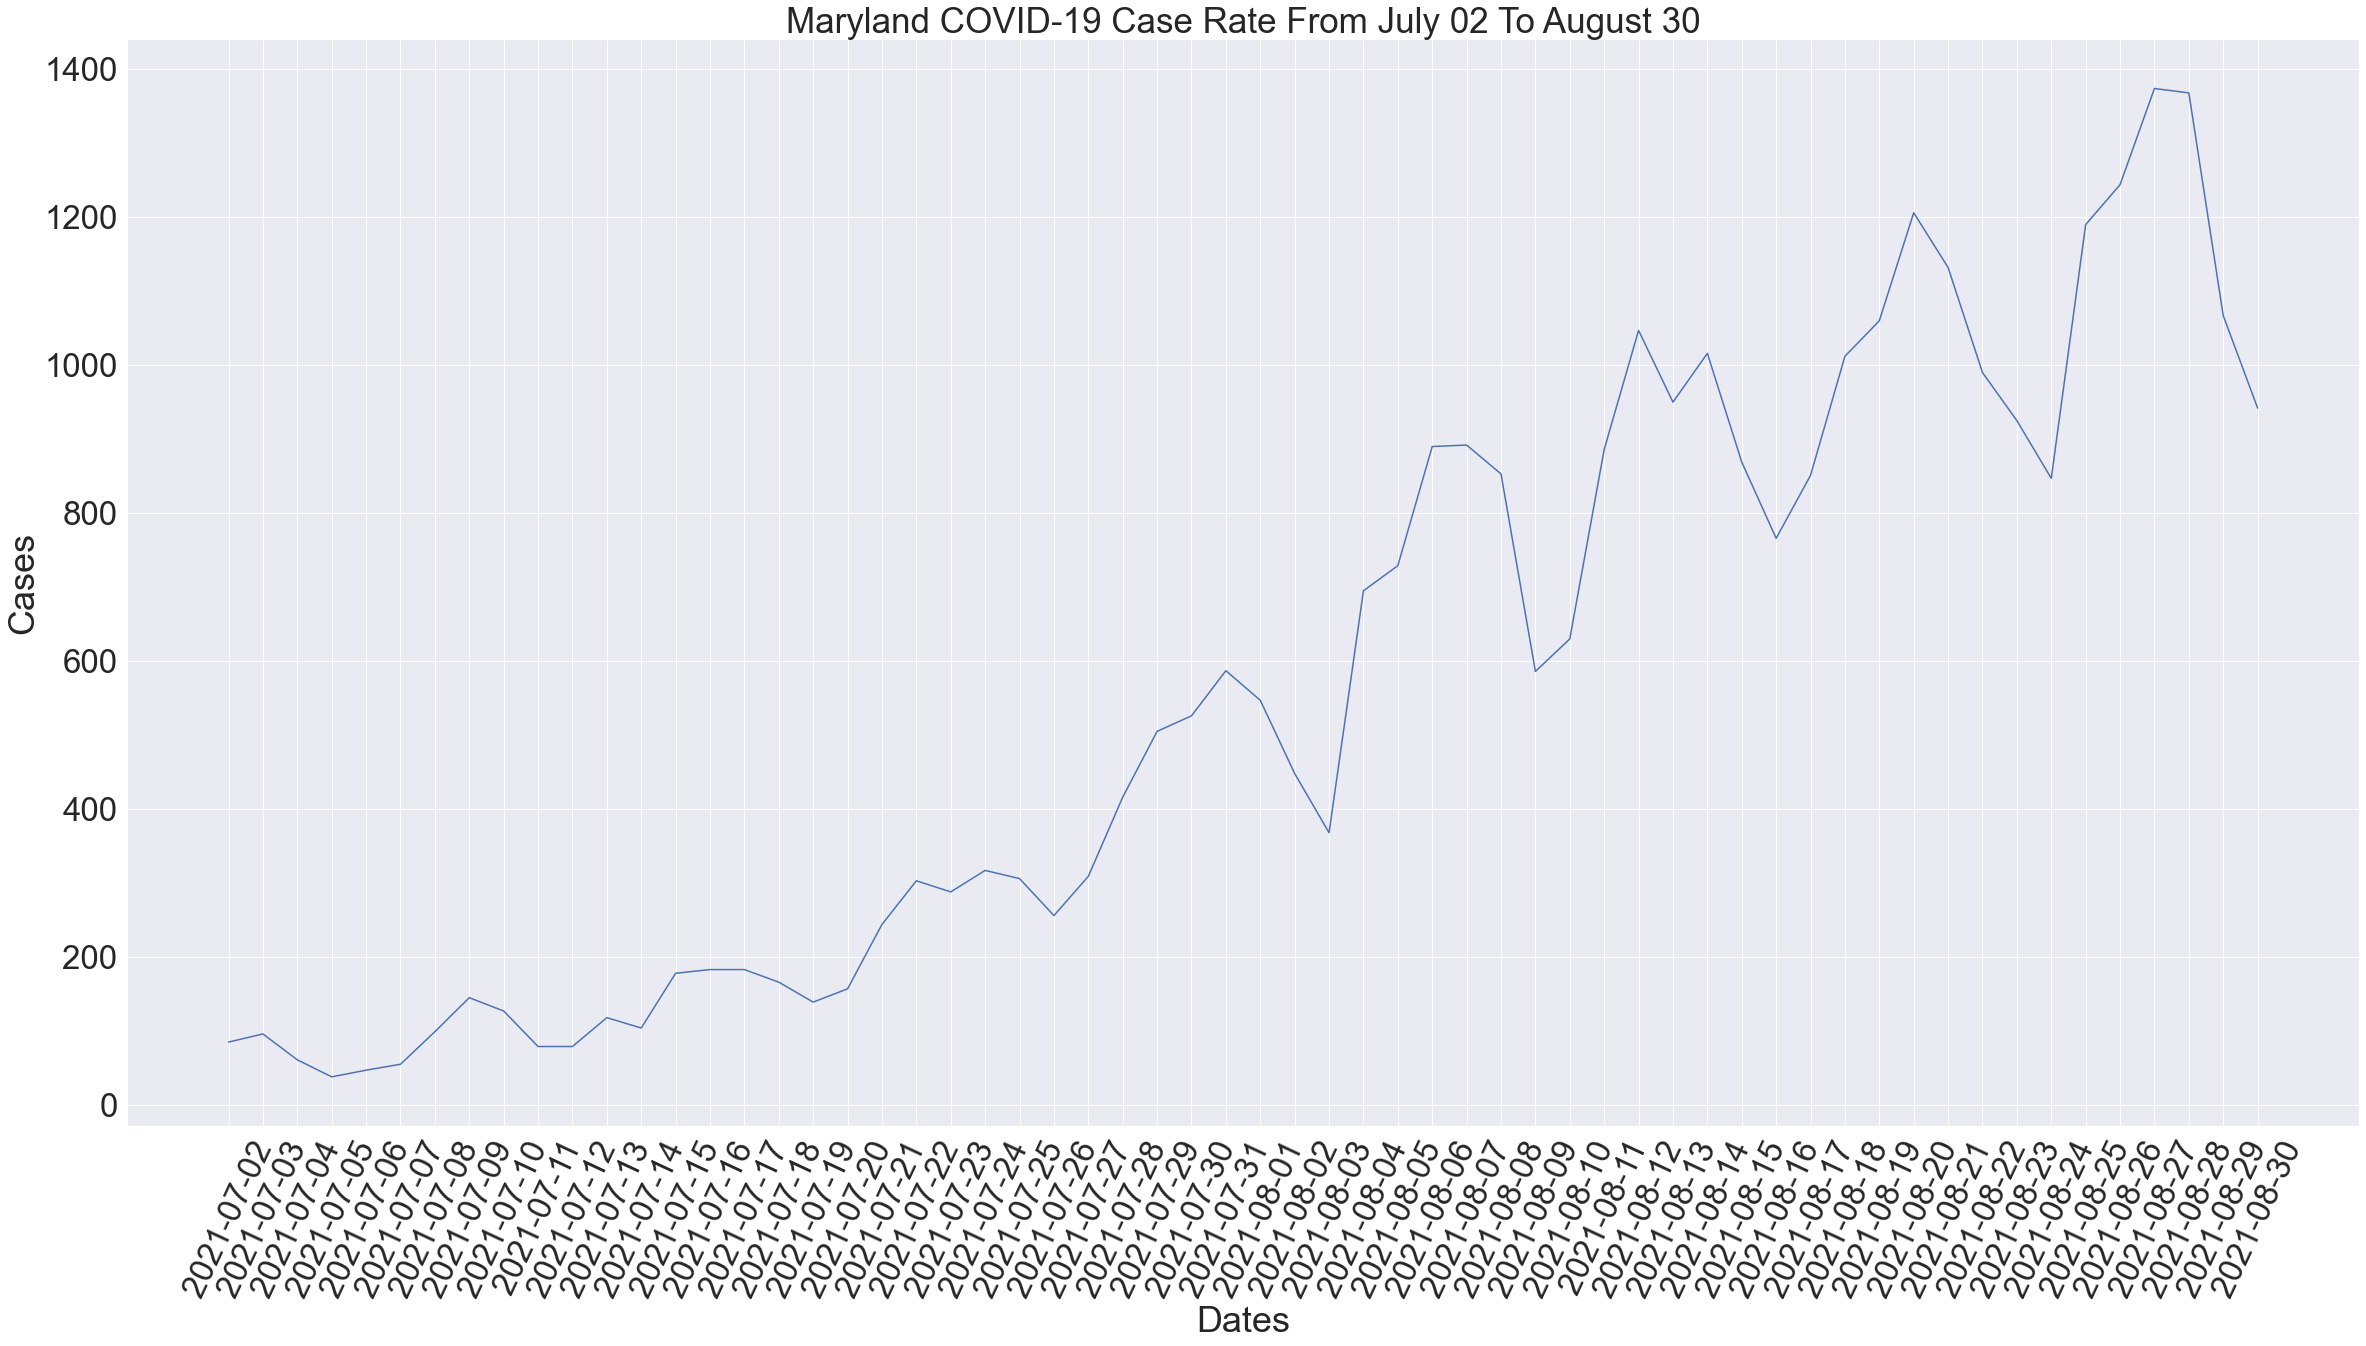

In [35]:
sns.set(font_scale=3)
plt.figure(figsize=figsize)
x=sns.lineplot(data=casesDF,y='cases',x='dates',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title(state+" COVID-19 Case Rate From "+firstdate+" To "+seconddate,fontsize=35);
#x.ticklabel_format(style='plain', axis='x')
x.set_xlabel("Dates")
x.set_ylabel("Cases")
display(round(casesDF.describe().T,2));

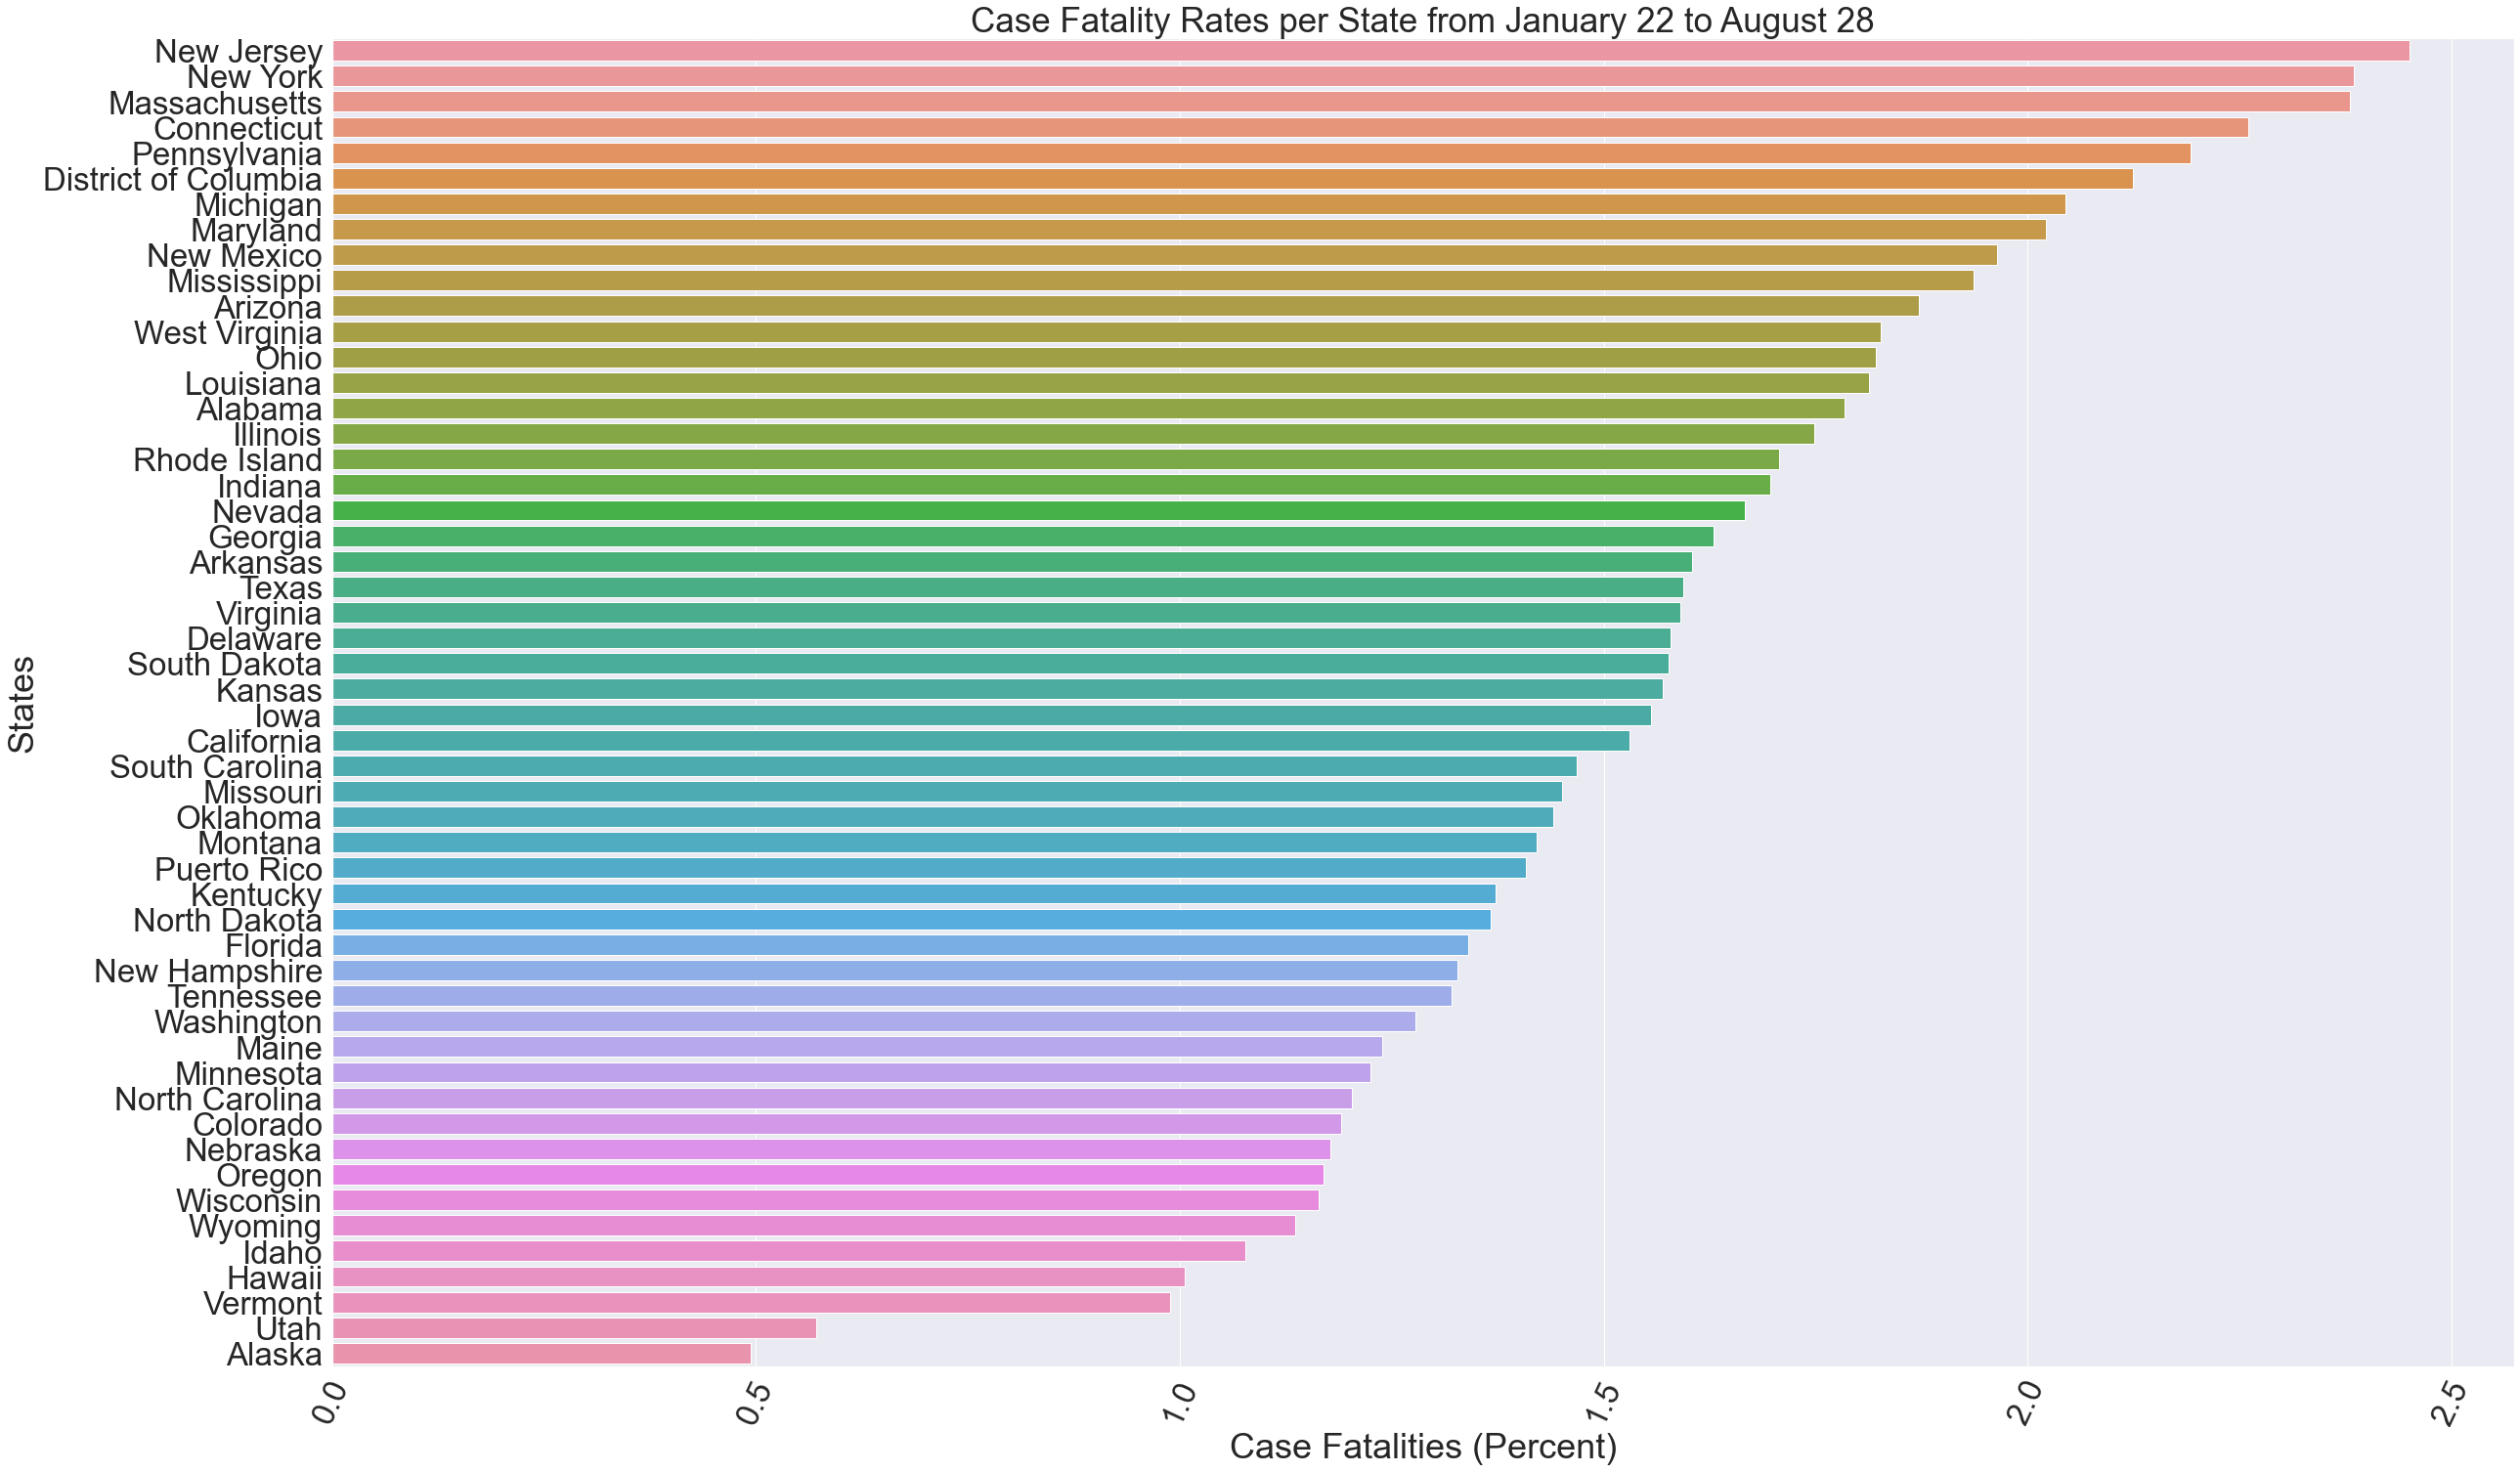

In [3105]:
sns.set(font_scale=3)
plt.figure(figsize=(40,25))
x=sns.barplot(data=cfrDF.sort_values(by='CFR',ascending=False),y='states',x='CFR',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title("Case Fatality Rates per State from "+firstdate+" to "+seconddate,fontsize=35);
#x.ticklabel_format(style='plain', axis='x')
x.set_xlabel("Case Fatalities (Percent)")
x.set_ylabel("States");

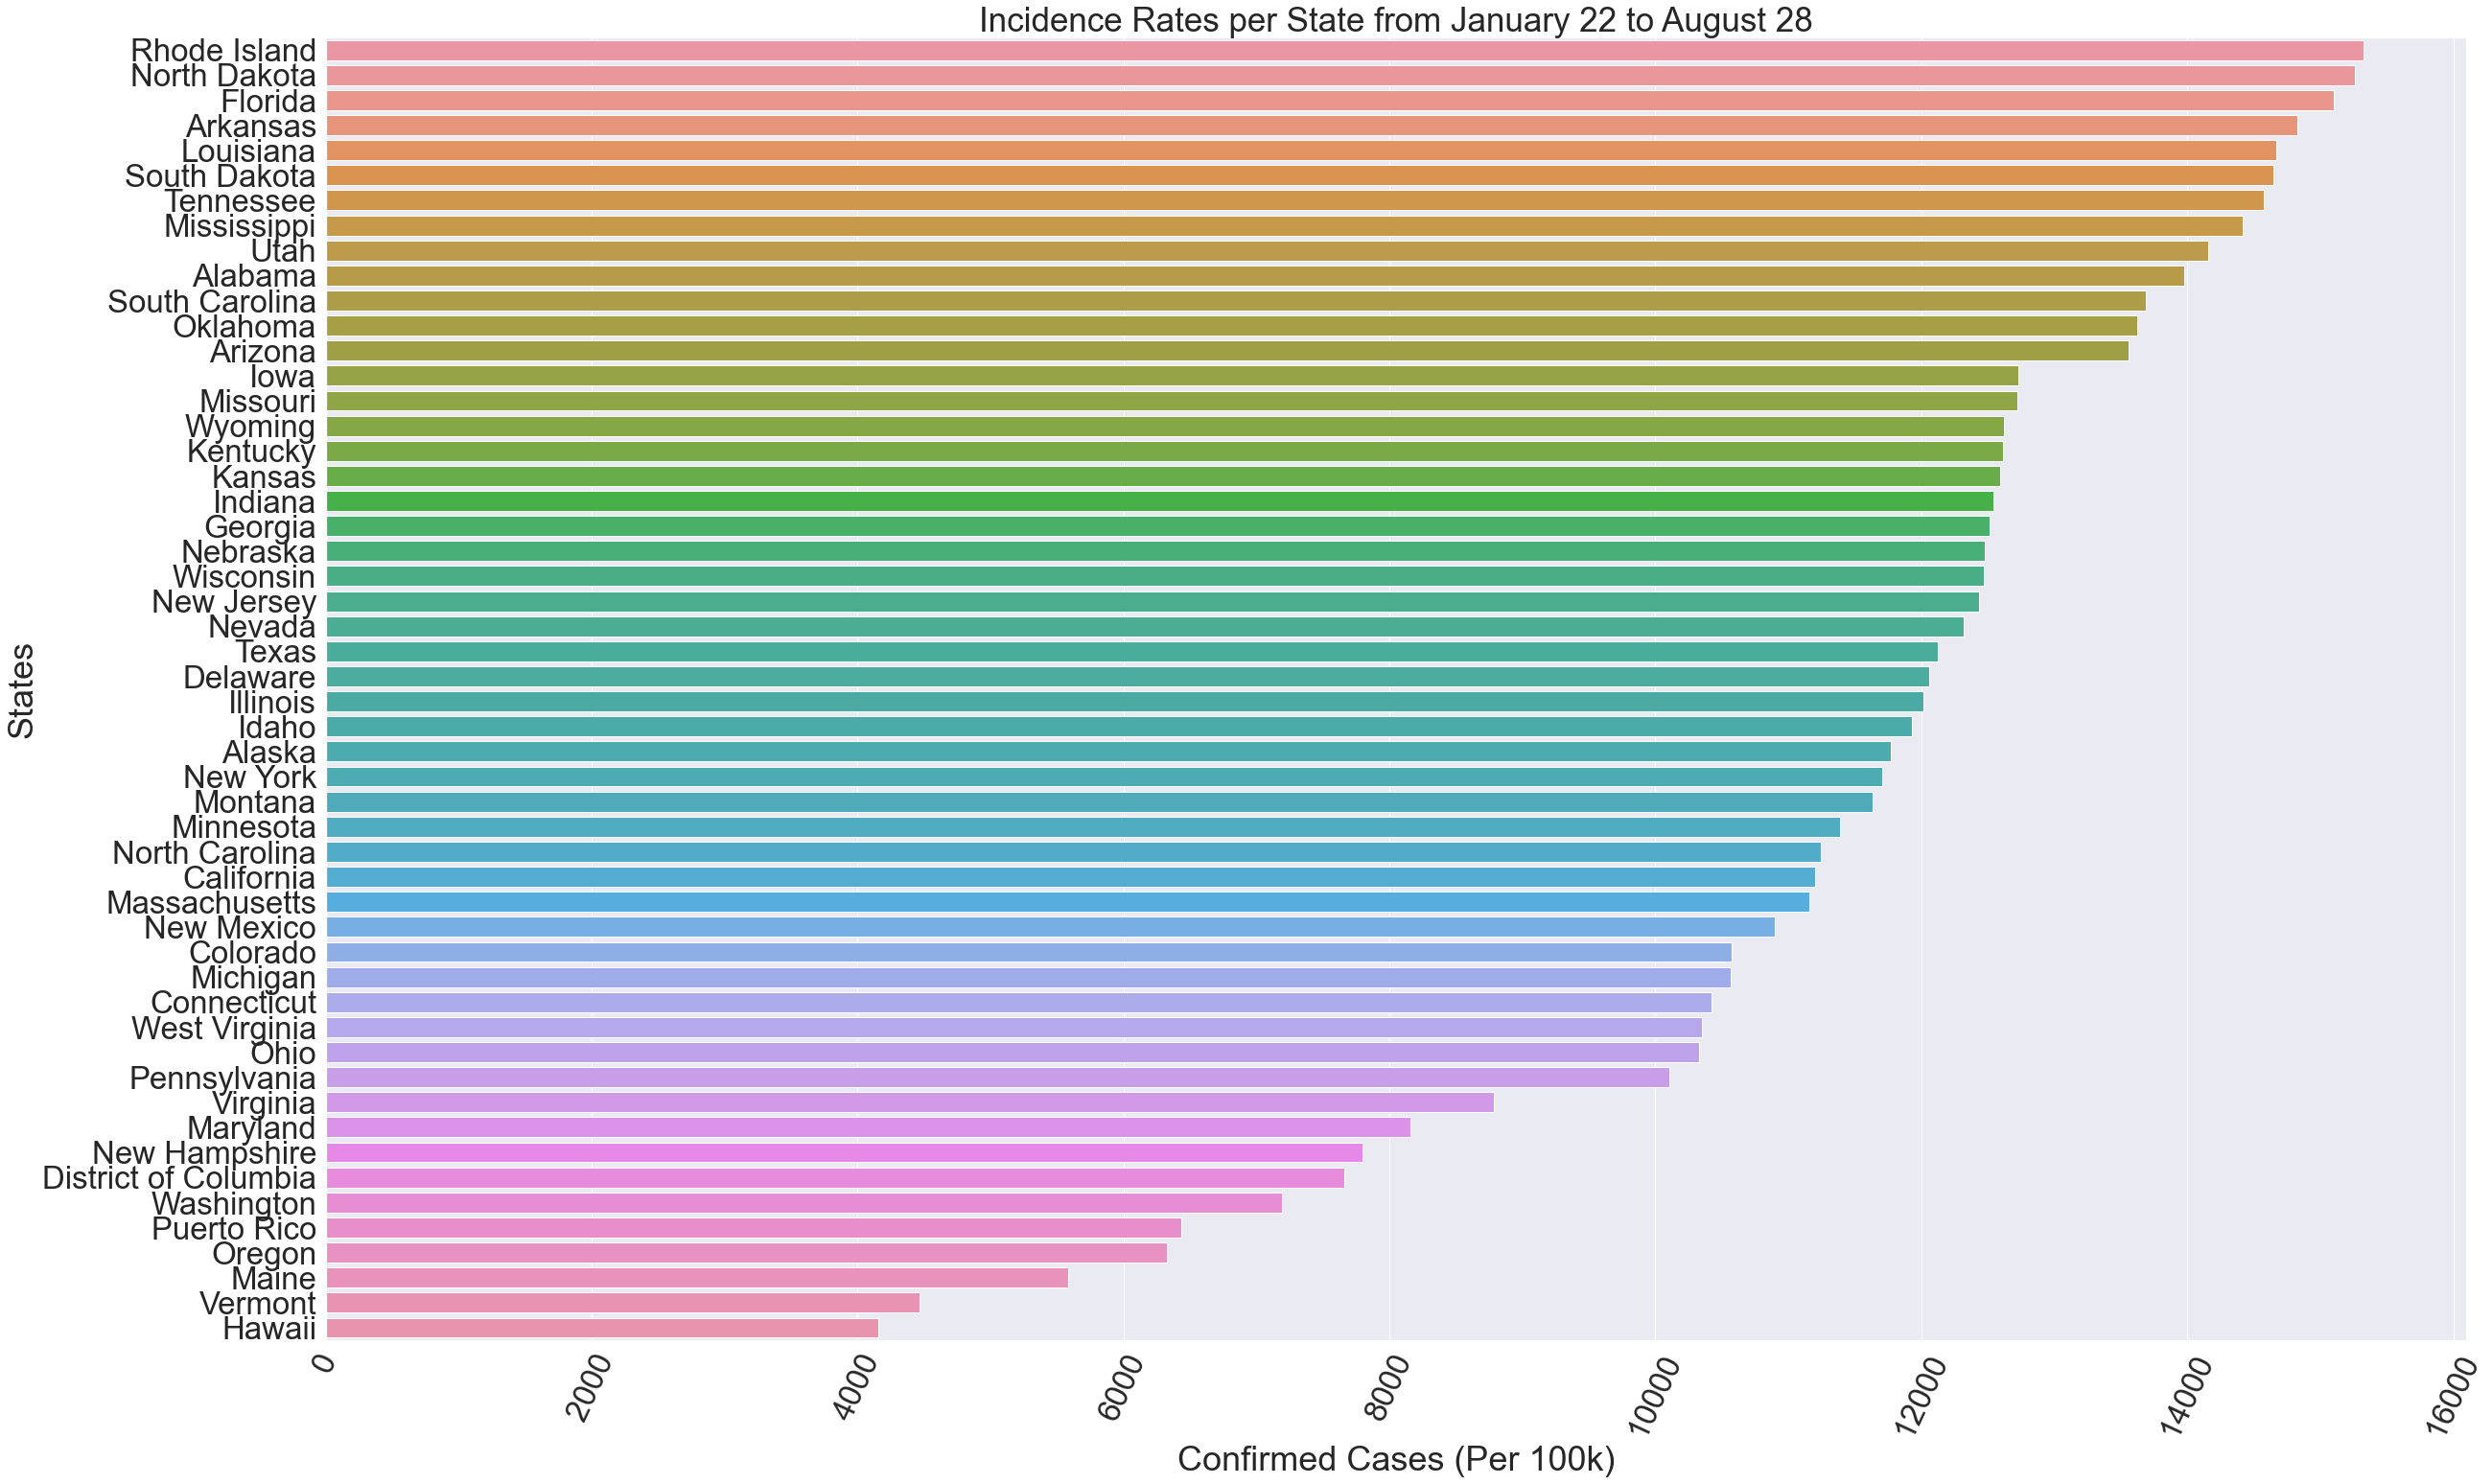

In [3106]:
sns.set(font_scale=3)
plt.figure(figsize=(40,25))
x=sns.barplot(data=irDF.sort_values(by='IR',ascending=False),y='states',x='IR',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title("Incidence Rates per State from "+firstdate+" to "+seconddate,fontsize=35);
#x.ticklabel_format(style='plain', axis='x')
x.set_xlabel("Confirmed Cases (Per 100k)")
x.set_ylabel("States");

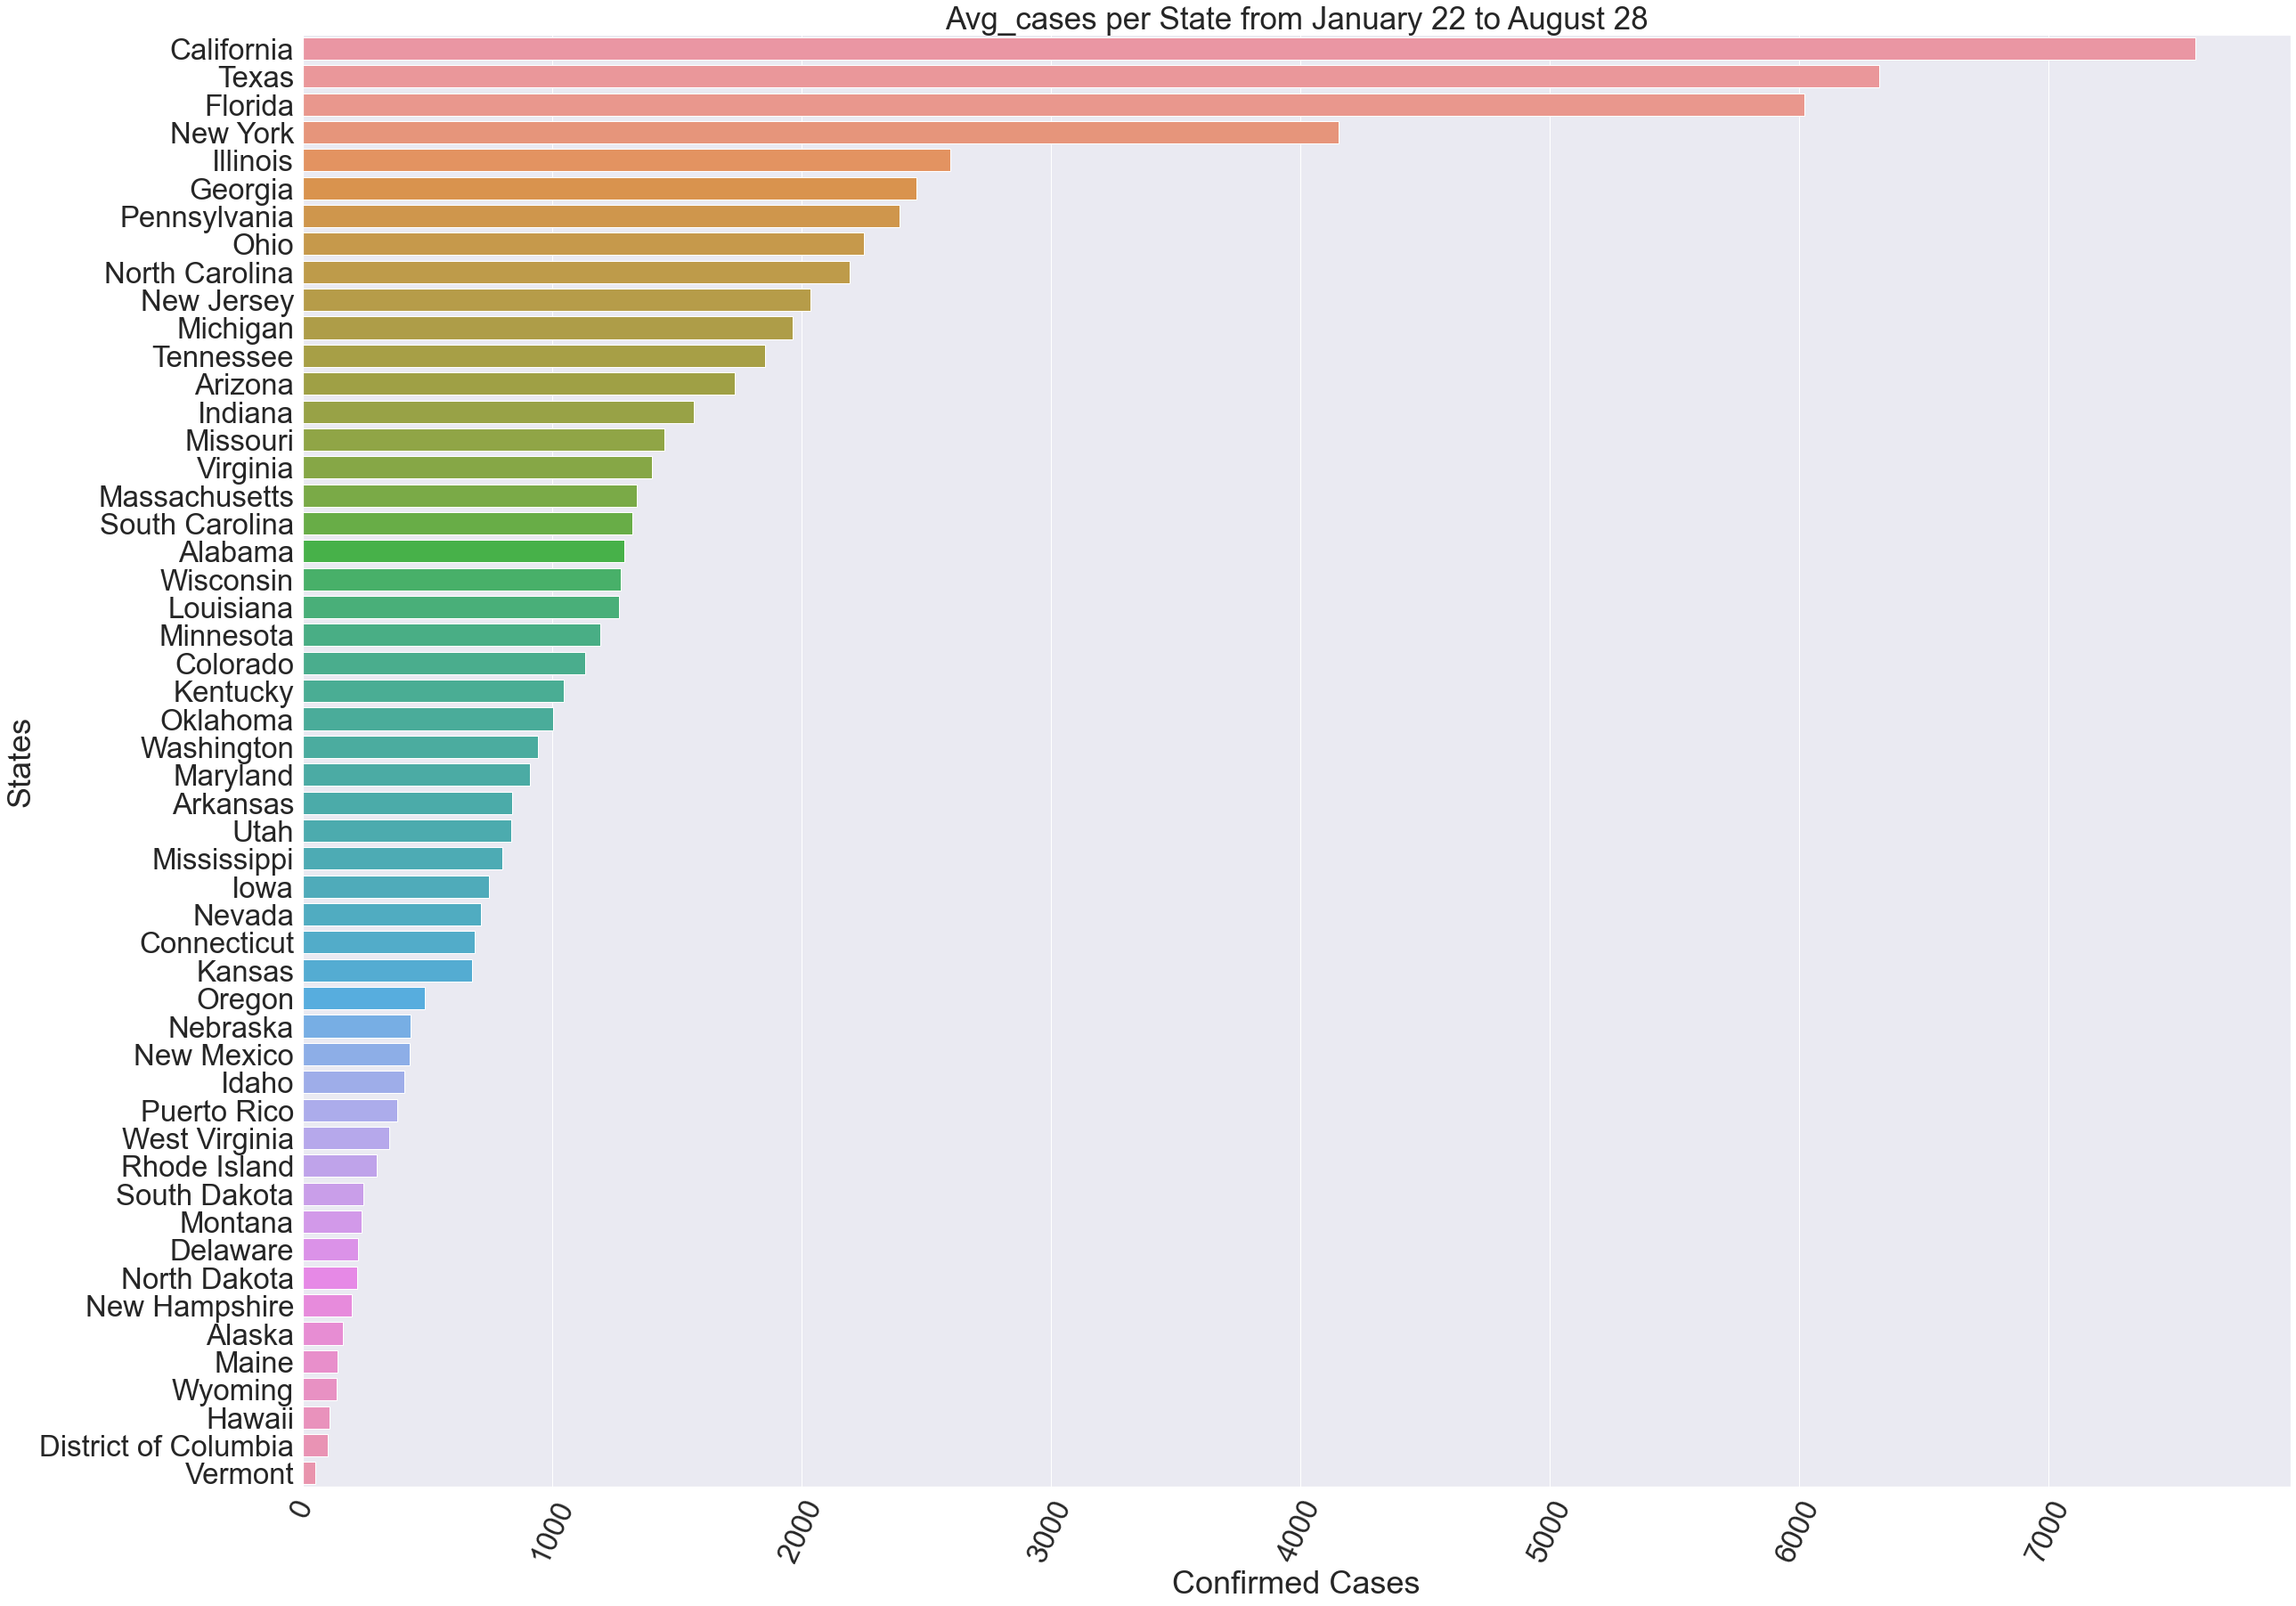

In [3108]:
xval='avg_cases'
sns.set(font_scale=3)
plt.figure(figsize=(40,30))
x=sns.barplot(data=statsDF.sort_values(by=xval,ascending=False),y='states',x=xval,ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title(xval.capitalize()+" per State from "+firstdate+" to "+seconddate,fontsize=35);
if xval=='curr_pop':
    x.ticklabel_format(style='plain', axis='x')
x.set_xlabel("Confirmed Cases")
x.set_ylabel("States");

In [2582]:
statsDF.sort_values(by='avg_deaths').reset_index()

index                states  avg_cases  avg_deaths  total_cases  \
0      28  District of Columbia     154.00        0.37         4158   
1      31               Vermont     102.19        0.56         2759   
2      38          South Dakota     205.93        0.70         5560   
3      43          North Dakota     172.67        0.81         4662   
4      12          Rhode Island     272.67        0.89         7362   
5      14         New Hampshire     217.33        1.04         5868   
6      46                 Maine     166.85        1.04         4505   
7       7              Nebraska     489.67        1.48        13221   
8      40              Delaware     264.33        1.56         7137   
9      21                Hawaii     624.67        1.67        16866   
10     45                Alaska     414.89        1.81        11202   
11     44               Wyoming     308.89        2.19         8340   
12     33           Connecticut     606.41        2.85        16373   
13     49               Montana     342.59        2.93         9250   
14     34                  Iowa     751.30        3.15        20285   
15     42            New Mexico     707.15        3.52        19093   
16     51         West Virginia     654.30        4.00        17666   
17     48                 Idaho     644.33        4.78        17397   
18     24             Minnesota    1166.26        4.85        31489   
19      4         Massachusetts    1259.81        5.07        34015   
20     18              Maryland     889.00        5.70        24003   
21      5             Wisconsin    1486.41        5.85        40133   
22      8                  Utah    1015.63        6.37        27422   
23     17              Colorado    1269.89        6.78        34287   
24     50           Puerto Rico     809.15        8.30        21847   
25      9                Oregon    1683.52        8.37        45455   
26     16            New Jersey    1673.81        8.37        45193   
27     32              Virginia    2232.15        8.78        60268   
28     29                Kansas    1210.70       10.56        32689   
29     36                  Ohio    2720.41       11.37        73451   
30     25              Oklahoma    2288.04       12.11        61777   
31     26          Pennsylvania    2186.63       12.22        59039   
32     37              Michigan    1607.33       12.44        43398   
33     23              Kentucky    2989.59       13.37        80719   
34     22               Indiana    2681.30       13.63        72395   
35      0            Washington    2909.52       14.89        78557   
36      3               Arizona    2764.30       17.70        74636   
37     11              New York    4062.89       17.74       109698   
38      1              Illinois    3283.11       18.67        88644   
39     19                Nevada    1116.96       19.30        30158   
40     27        South Carolina    3596.93       20.30        97117   
41     20             Tennessee    4581.81       22.33       123709   
42     47               Alabama    3563.74       22.85        96221   
43     15        North Carolina    5265.48       25.30       142168   
44     39              Arkansas    2221.41       25.74        59978   
45     41           Mississippi    3116.11       27.26        84135   
46     30              Missouri    2652.04       29.63        71605   
47     13               Georgia    6890.48       31.41       186043   
48     35             Louisiana    5115.44       50.37       138117   
49      2            California   13286.96       70.81       358748   
50      6                 Texas   15408.26      115.44       416023   
51     10               Florida   21815.37      181.48       589015   

    total_deaths  curr_pop  percent  
0             10    712816    55.43  
1             15    623347    66.97  
2             19    892717    47.33  
3             22    765309    40.44  
4             24   1057125    62.66  
5           

In [2395]:
# Daily COVID-19 deaths by state
states_daily=pd.read_csv("us-states.csv")
other=""
state='Maryland'
year='2021'
grouping='deaths'
if grouping=='deaths':
    other="cases"
else:
    other='deaths'
stats=states_daily.groupby('state')[['cases','deaths']].agg('last').reset_index()
stats=states_daily.merge(pop)
stats.loc[:,'case_fatality']=round((stats['deaths']/stats['cases'])*100,3)
stats.loc[:,'incidence_rate']=round((stats['cases']/stats['POP2020'])*100000,3)
states_daily=states_daily[(states_daily['state']==state) & (states_daily['date'].str.startswith(year))].groupby('date')[grouping].agg('sum').reset_index()
stats=stats[(stats['state']==state) & (stats['date'].str.startswith(year))].groupby('date')[stats.columns].agg('sum').reset_index()

#states_daily

In [2305]:
#states_daily.loc[:,'year']=states_daily['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%y'))
states_daily.loc[:,'month']=states_daily['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%m'))
#states_daily.loc[:,'day']=states_daily['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%d'))
stats.loc[:,'month']=stats['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%m'))


In [2306]:
month1='07'
month2='08'
mo1=states_daily[(states_daily['month']>=month1) & (states_daily['month']<=month2)].reset_index(drop=True)
stats=stats[(stats['month']>=month1) & (stats['month']<=month2)].reset_index(drop=True)

In [2307]:
count=30
mo1=mo1.iloc[count:].reset_index(drop=True)
stats=stats.iloc[count:].reset_index(drop=True)    
display(mo1.head(5))
display(stats.head(5))

date  deaths month
0  2021-07-31    9825    07
1  2021-08-01    9828    08
2  2021-08-02    9829    08
3  2021-08-03    9835    08
4  2021-08-04    9840    08

date  fips   cases  deaths  POP2020  case_fatality  incidence_rate  \
0  2021-07-31    24  468767    9825  6055802          2.096        7740.791   
1  2021-08-01    24  469314    9828  6055802          2.094        7749.824   
2  2021-08-02    24  469762    9829  6055802          2.092        7757.222   
3  2021-08-03    24  470130    9835  6055802          2.092        7763.299   
4  2021-08-04    24  470825    9840  6055802          2.090        7774.775   

  month  
0    07  
1    08  
2    08  
3    08  
4    08

In [2308]:
count=0
months=mo1['date']
data=mo1
col=grouping
lst=[]
lst2=[]
first=data[col][count]
while count < len(data)-1:
    count+=1
    lst.append(data[col][count]-data[col][count-1])
    deaths=data[col][count]-data[col][count-1]
    if len(lst) == 1:
        if lst[0] >= 0:
            lst2.append(lst[0])
        else:
            lst2.append(-(lst[0]))
        continue
    if deaths < 0:
        lst2.append(-(lst[count-1]))
    else:
        lst2.append(lst[count-1])
lst2.insert(0,first)
print(lst2)

[9825, 3, 1, 6, 5, 2, 4, 3, 8, 4, 8, 1, 3, 5, 9, 4, 5, 3, 8, 9, 6, 16, 5, 5, 8, 11, 4, 8]


In [2309]:
#STATS
count=0
months=stats['date']
data=stats
col="cases"
lst3=[]
lst4=[]
first=data[col][count]
while count < len(data)-1:
    count+=1
    lst3.append(data[col][count]-data[col][count-1])
    deaths=data[col][count]-data[col][count-1]
    if len(lst3) == 1:
        if lst3[0] >= 0:
            lst4.append(lst3[0])
        else:
            lst4.append(-(lst3[0]))
        continue
    if deaths < 0:
        lst4.append(-(lst3[count-1]))
    else:
        lst4.append(lst3[count-1])
lst4.insert(0,first)

count=0
months=stats['date']
data=stats
col="deaths"
lst5=[]
lst6=[]
first=data[col][count]
while count < len(data)-1:
    count+=1
    lst5.append(data[col][count]-data[col][count-1])
    deaths=data[col][count]-data[col][count-1]
    if len(lst5) == 1:
        if lst5[0] >= 0:
            lst6.append(lst5[0])
        else:
            lst6.append(-(lst5[0]))
        continue
    if deaths < 0:
        lst6.append(-(lst5[count-1]))
    else:
        lst6.append(lst5[count-1])
lst6.insert(0,first)
print(lst4,"CASES")
print(lst6,"DEATHS")

[468767, 547, 448, 368, 695, 729, 890, 892, 853, 586, 630, 886, 1047, 950, 1016, 869, 766, 851, 1012, 1060, 1206, 1132, 990, 925, 847, 1190, 1244, 1374] CASES
[9825, 3, 1, 6, 5, 2, 4, 3, 8, 4, 8, 1, 3, 5, 9, 4, 5, 3, 8, 9, 6, 16, 5, 5, 8, 11, 4, 8] DEATHS


In [2310]:
IR=round((sum(lst4[1:])/stats['POP2020'].iloc[0])*100000,3)

In [2311]:
CFR=round((sum(lst6[1:])/sum(lst4[1:]))*100,3)

In [2312]:
df=pd.DataFrame({'dates':mo1['date'][1:],grouping:lst2[1:]})
firstdate=datetime.datetime.strptime(df['dates'].iloc[0],'%Y-%m-%d').strftime('%B %d')
seconddate=datetime.datetime.strptime(df['dates'].iloc[-1],'%Y-%m-%d').strftime('%B %d')

for num in pop['state'].tolist():
    if num==state:
        popstate=pop.sort_values(by='POP2020',ascending=False).reset_index(drop=True)
        x=popstate['state'].tolist().index(num)
        vaxxedorder=popvaxxed.sort_values(by='percent',ascending=False).reset_index(drop=True)
        pct=vaxxedorder['full_name'].tolist().index(num)
        ppsm=state_sqmi['states'].tolist().index(num)
        sqmiorder=state_sqmi.sort_values(by='sq_mi',ascending=False).reset_index(drop=True)
        sqmiNum=sqmiorder['states'].tolist().index(num)
        cfrDF=cfrDF.sort_values(by='CFR',ascending=False).reset_index(drop=True)
        cfrNum=cfrDF['states'].tolist().index(num)
        irDF=irDF.sort_values(by='IR',ascending=False).reset_index(drop=True)
        irNum=irDF['states'].tolist().index(num)
        totalpop=popstate.iloc[[x]]['POP2020'][x]
        both21=both21.sort_values(by='case_fatality',ascending=False).reset_index(drop=True)
        z=both21['state'].tolist().index(num)
        natrank1=both21['state'].tolist().index(num)
        cfr=both21.iloc[[z]]['case_fatality'][z]
        both21=both21.sort_values(by='incidence_rate',ascending=False).reset_index(drop=True)
        z=both21['state'].tolist().index(num)
        ir=both21.iloc[[z]]['incidence_rate'][z]
        natrank2=both21['state'].tolist().index(num)
        totcases=statsDF.sort_values(by='total_cases',ascending=False).reset_index(drop=True)
        totdeaths=statsDF.sort_values(by='total_deaths',ascending=False).reset_index(drop=True)
        casesNum=totcases['states'].tolist().index(num)
        deathsNum=totdeaths['states'].tolist().index(num)
        display("State of "+state)
        if grouping=="cases":
            avgstats=statsDF.sort_values(by='avg_cases',ascending=False).reset_index(drop=True)
            statsNum=avgstats['states'].tolist().index(num)
            txt="Average of {:,} "+grouping+" per day in "+str(round(df.describe().iloc[0][0],2))+" days, currently ranked #"+str(statsNum+1)+" in the United States."                    
            display(txt.format(round(df.describe().iloc[1][0],2),2))
            avgstats=statsDF.sort_values(by='avg_deaths',ascending=False).reset_index(drop=True)
            statsNum=avgstats['states'].tolist().index(num)
            txt="Average of {:,} deaths per day in "+str(round(df.describe().iloc[0][0],2))+" days, currently ranked #"+str(statsNum+1)+" in the United States."
            display(txt.format(round(sum(lst6[1:])/len(lst6[1:]),2)))
        else:
            avgstats=statsDF.sort_values(by='avg_deaths',ascending=False).reset_index(drop=True)
            statsNum=avgstats['states'].tolist().index(num)
            txt="Average of {:,} "+grouping+" per day in "+str(round(df.describe().iloc[0][0],2))+" days, currently ranked #"+str(statsNum+1)+" in the United States."                    
            display(txt.format(round(df.describe().iloc[1][0],2),2))
            avgstats=statsDF.sort_values(by='avg_cases',ascending=False).reset_index(drop=True)
            statsNum=avgstats['states'].tolist().index(num)
            txt="Average of {:,} cases per day in "+str(round(df.describe().iloc[0][0],2))+" days, currently ranked #"+str(statsNum+1)+" in the United States."
            display(txt.format(round(sum(lst4[1:])/len(lst4[1:]),2)))
        display("Case Fatality Ratio from "+firstdate+" to "+seconddate+": "+str(CFR)+"%, currently ranked #"+str(cfrNum+1)+" in the United States.")
        txt="Incidence Rate from "+firstdate+" to "+seconddate+": {:,} per 100k, currently ranked #"+str(irNum+1)+" in the United States."
        display(txt.format(IR))
        txt="There have been {:,} "+grouping+" from "+firstdate+" To "+seconddate+", currently ranked #{} in the United States."
        if grouping=="cases":
            display(txt.format(df[grouping].sum(),casesNum+1))
        else:
            display(txt.format(df[grouping].sum(),deathsNum+1))
        txt="There have been {:,} "+other+" from "+firstdate+" To "+seconddate+", currently ranked #{} in the United States."
        if other=="cases":
            display(txt.format(sum(lst4[1:]),casesNum+1))
        else:
            display(txt.format(sum(lst6[1:]),deathsNum+1))
        display(state+" is "+str(vaxxedorder.iloc[pct]['percent'])+"% fully vaccinated, currently ranked #"+str(pct+1)+" in the United States.")
        txt="Total population: {:,}, ranked #"+str(x+1)+" in the United States."
        display(txt.format(totalpop))
        txt="There are {:,} people per square mile, ranked #"+str(ppsm+1)+" in the United States." 
        display(txt.format(state_sqmi.iloc[ppsm]['ppsm']))
        txt=state+" has {:,} total square miles, ranking #"+str(sqmiNum+1)+" in the United States."
        display(txt.format(sqmiorder.iloc[sqmiNum]['sq_mi']))
        display("All Time Case Fatality Ratio: "+str(cfr)+"%, currently ranked #"+str(natrank1+1)+" in the United States.")
        txt="All Time Incidence Rate: {:,} per 100k, currently ranked #"+str(natrank2+1)+" in the United States."
        display(txt.format(ir))
        display(round(df.describe().T,2))

'State of Maryland'

'Average of 5.7 deaths per day in 27.0 days, currently ranked #32 in the United States.'

'Average of 889.0 cases per day in 27.0 days, currently ranked #33 in the United States.'

'Case Fatality Ratio from August 01 to August 27: 0.642%, currently ranked #14 in the United States.'

'Incidence Rate from August 01 to August 27: 396.364 per 100k, currently ranked #51 in the United States.'

'There have been 154 deaths from August 01 To August 27, currently ranked #32 in the United States.'

'There have been 24,003 cases from August 01 To August 27, currently ranked #33 in the United States.'

'Maryland is 59.63% fully vaccinated, currently ranked #7 in the United States.'

'Total population: 6,055,802, ranked #19 in the United States.'

'There are 623.99 people per square mile, ranked #6 in the United States.'

'Maryland has 12,406 total square miles, ranking #42 in the United States.'

'All Time Case Fatality Ratio: 2.023%, currently ranked #8 in the United States.'

'All Time Incidence Rate: 8,137.155 per 100k, currently ranked #44 in the United States.'

count  mean  std  min  25%  50%  75%   max
deaths   27.0   5.7  3.3  1.0  3.5  5.0  8.0  16.0

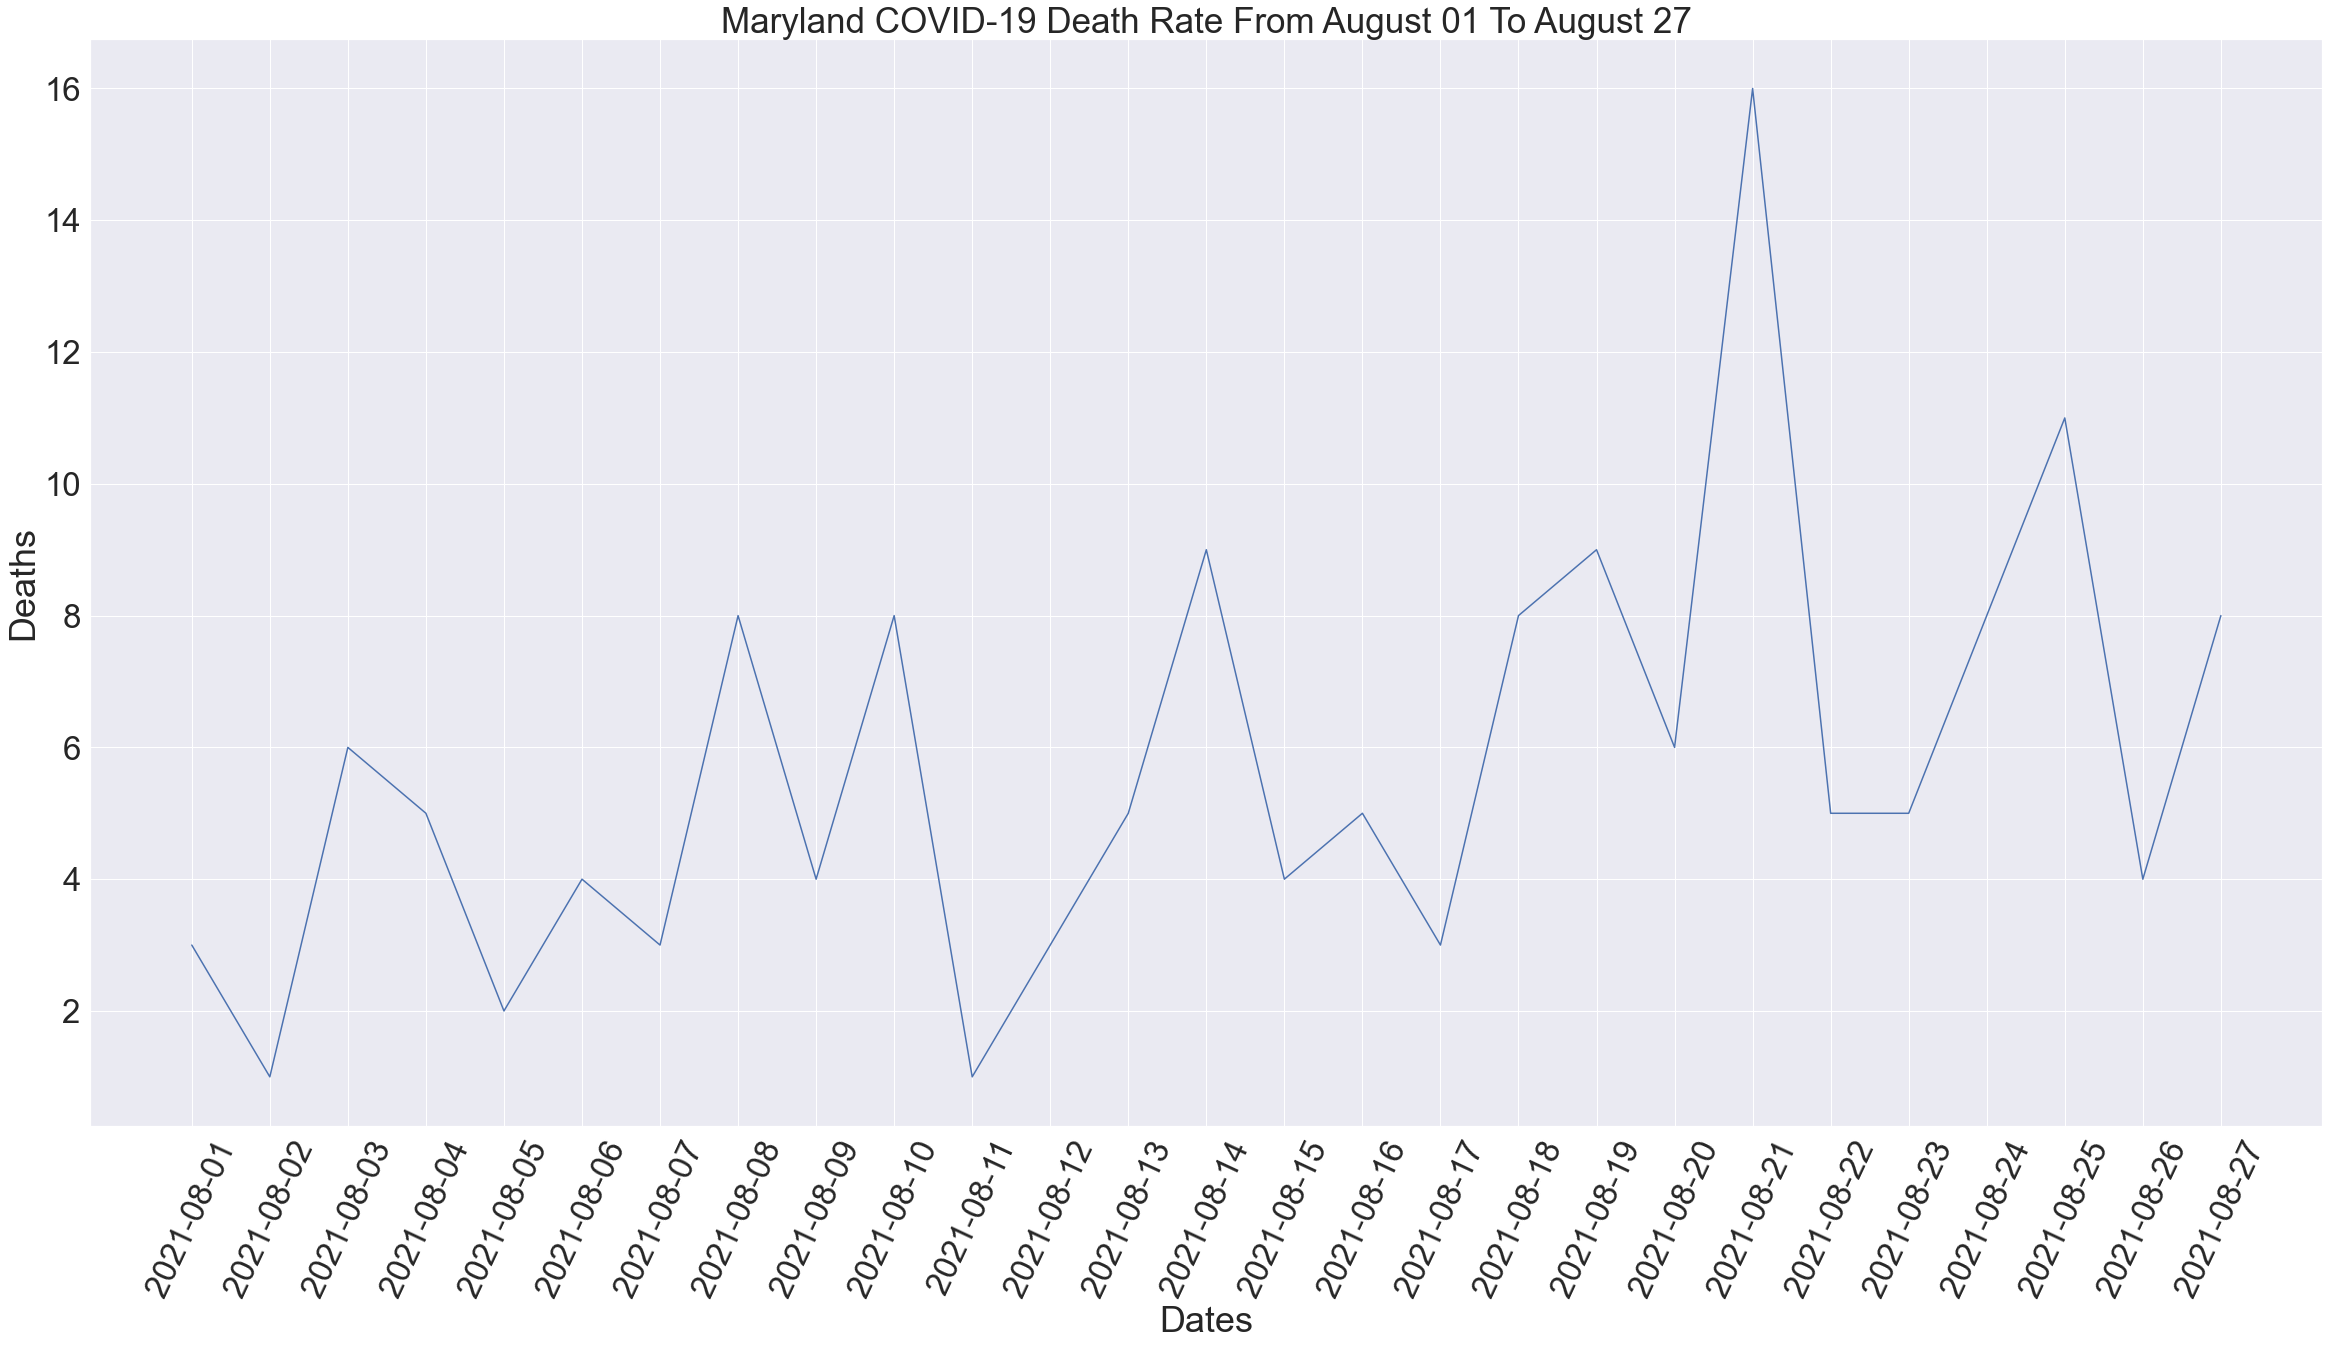

In [2313]:
sns.set(font_scale=3)
plt.figure(figsize=(40,20))
x=sns.lineplot(data=df,y=grouping,x='dates',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title(state+" COVID-19 "+grouping[:-1].capitalize()+" Rate From "+firstdate+" To "+seconddate,fontsize=35);
#x.ticklabel_format(style='plain', axis='x')
x.set_xlabel("Dates")
x.set_ylabel(grouping.capitalize());

In [1814]:
# COVID-19 monthly death rate
usstates=pd.read_csv("us-states.csv")
#state='Rhode Island'
#grouping='cases'
newmonths=["March '20","April '20","May '20","June '20","July '20","August '20",
               "September '20","October '20","November '20","December '20",
           "January '21","February '21","March '21","April '21","May '21","June '21","July '21","August '21"]
usstates.loc[:,'mo']=usstates['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%m'))
usstates.loc[:,'year']=usstates['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%y'))
if usstates['year'].iloc[0]=='20' and usstates['mo'].iloc[0]!='03':
    usstates=usstates[(usstates['mo']>='03') | (usstates['year']=='21')]
usstates=usstates[(usstates['state']==state)].groupby('date')[grouping].agg('sum').reset_index()
usstates

date  deaths
0    2020-03-05       0
1    2020-03-06       0
2    2020-03-07       0
3    2020-03-08       0
4    2020-03-09       0
..          ...     ...
536  2021-08-23    9948
537  2021-08-24    9956
538  2021-08-25    9967
539  2021-08-26    9963
540  2021-08-27    9971

[541 rows x 2 columns]

In [1815]:
#usstates.loc[:,'year']=usstates['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%y'))
usstates.loc[:,'month']=usstates['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%B'+" '%y"))
#usstates.loc[:,'day']=usstates['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%d'))

In [1816]:
lst=[]
for mo in usstates['month'].unique().tolist():
    x=usstates[usstates['month']==mo]
    lst.append(x[grouping].iloc[-1])

In [1817]:
df=pd.DataFrame({'months':newmonths,grouping:lst})
df

months  deaths
0       March '20      18
1       April '20    1139
2         May '20    2532
3        June '20    3190
4        July '20    3493
5      August '20    3755
6   September '20    3949
7     October '20    4147
8    November '20    4641
9    December '20    5895
10    January '21    7127
11   February '21    7869
12      March '21    8286
13      April '21    8744
14        May '21    9614
15       June '21    9741
16       July '21    9825
17     August '21    9971

In [1818]:
count=0
months=newmonths
data=df
col=grouping
lst=[]
lst2=[]
first=data[col][count]
while count < len(data)-1:
    count+=1
    lst.append(data[col][count]-data[col][count-1])
    deaths=data[col][count]-data[col][count-1]
    if len(lst) == 1:
        if lst[0] >= 0:
            lst2.append(lst[0])
        else:
            lst2.append(-(lst[0]))
        continue
    if deaths < 0:
        lst2.append(-(lst[count-1]))
    else:
        lst2.append(lst[count-1])
lst2.insert(0,first)
print(lst2)

[18, 1121, 1393, 658, 303, 262, 194, 198, 494, 1254, 1232, 742, 417, 458, 870, 127, 84, 146]


In [1819]:
df=pd.DataFrame({'months':months,grouping:lst2})
display(df)
display("State of "+state)
display(round(df.describe(),2))

for num in pop['state'].tolist():
    if num==state:
        x=pop['state'].tolist().index(num)
        totalpop=pop.iloc[[x]]['POP2020'][x]
        display("Total population: "+str(totalpop))
        display("There have been "+str(df[grouping].sum())+" "+grouping+" from "+df['months'].iloc[0]+" To "+df['months'].iloc[-1])
        display("Average of "+str(round(df.describe().iloc[1][0],2))+" "+grouping+" per month in "+str(round(df.describe().iloc[0][0],2))+" months.")

months  deaths
0       March '20      18
1       April '20    1121
2         May '20    1393
3        June '20     658
4        July '20     303
5      August '20     262
6   September '20     194
7     October '20     198
8    November '20     494
9    December '20    1254
10    January '21    1232
11   February '21     742
12      March '21     417
13      April '21     458
14        May '21     870
15       June '21     127
16       July '21      84
17     August '21     146

'State of Maryland'

deaths
count    18.00
mean    553.94
std     448.15
min      18.00
25%     195.00
50%     437.50
75%     838.00
max    1393.00

'Total population: 6055802'

"There have been 9971 deaths from March '20 To August '21"

'Average of 553.94 deaths per month in 18.0 months.'

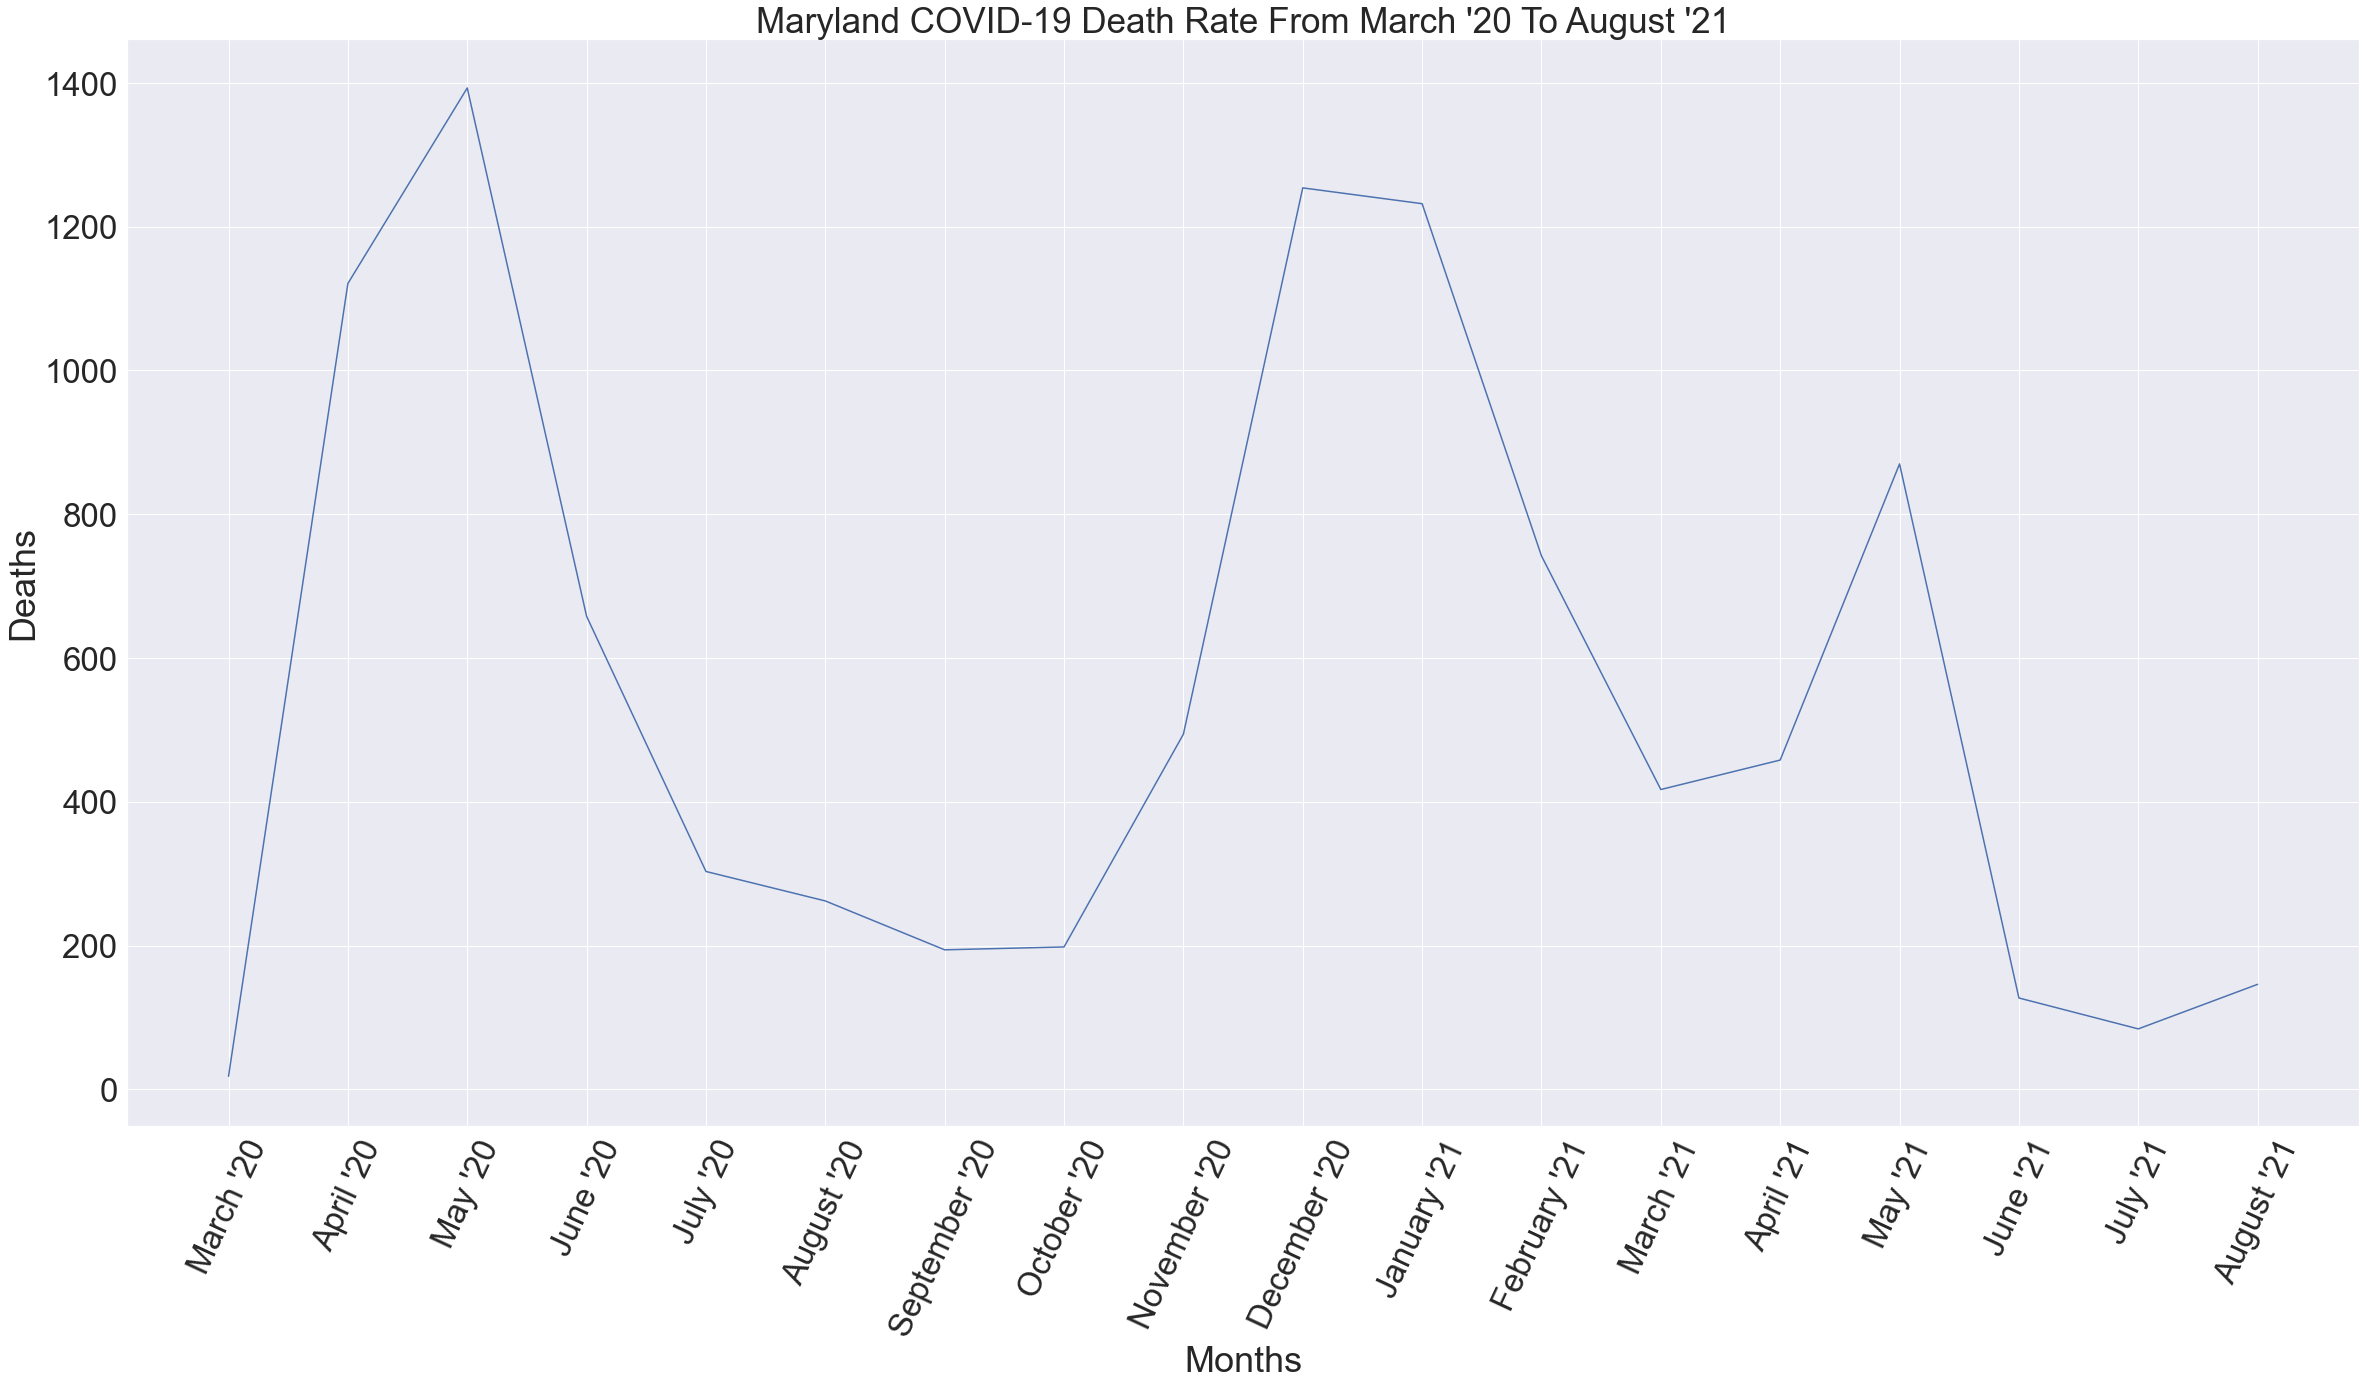

In [1820]:
sns.set(font_scale=3)
plt.figure(figsize=(40,20))
x=sns.lineplot(data=df,y=grouping,x='months',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title(state+" COVID-19 "+grouping[:-1].capitalize()+" Rate From "+df['months'].iloc[0]+" To "+df['months'].iloc[-1],fontsize=35);
x.ticklabel_format(style='plain', axis='y')
x.set_xlabel("Months")
x.set_ylabel(grouping.capitalize());

In [1793]:
test=pd.read_csv("us.csv")

In [1794]:
test.loc[:,'month']=test['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%m'))
test.loc[:,'year']=test['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%y'))

In [1795]:
test=test[test['year']=='21']

In [1796]:
test=test.groupby('month')['deaths'].agg('last').reset_index()
test

month  deaths
0    01  441299
1    02  512979
2    03  551658
3    04  575637
4    05  594321
5    06  604446
6    07  612919
7    08  636491

In [1797]:
lst=[]
lst2=[]
count=0
for stuff in reversed(test['deaths'].tolist()):
    print(stuff,"STUFF")
    lst.append(stuff)
    if len(lst)>1:
        print(lst[count],"1st")
        print(lst[count+1],"2nd")
        print(lst[count]-lst[count+1],"DIFFERENCE")
        lst2.append(lst[count]-lst[count+1])
        count+=1
        print(count)

636491 STUFF
612919 STUFF
636491 1st
612919 2nd
23572 DIFFERENCE
1
604446 STUFF
612919 1st
604446 2nd
8473 DIFFERENCE
2
594321 STUFF
604446 1st
594321 2nd
10125 DIFFERENCE
3
575637 STUFF
594321 1st
575637 2nd
18684 DIFFERENCE
4
551658 STUFF
575637 1st
551658 2nd
23979 DIFFERENCE
5
512979 STUFF
551658 1st
512979 2nd
38679 DIFFERENCE
6
441299 STUFF
512979 1st
441299 2nd
71680 DIFFERENCE
7


In [1798]:
df=pd.DataFrame({'months':test['month'].tolist()[1:],'deaths':lst2})

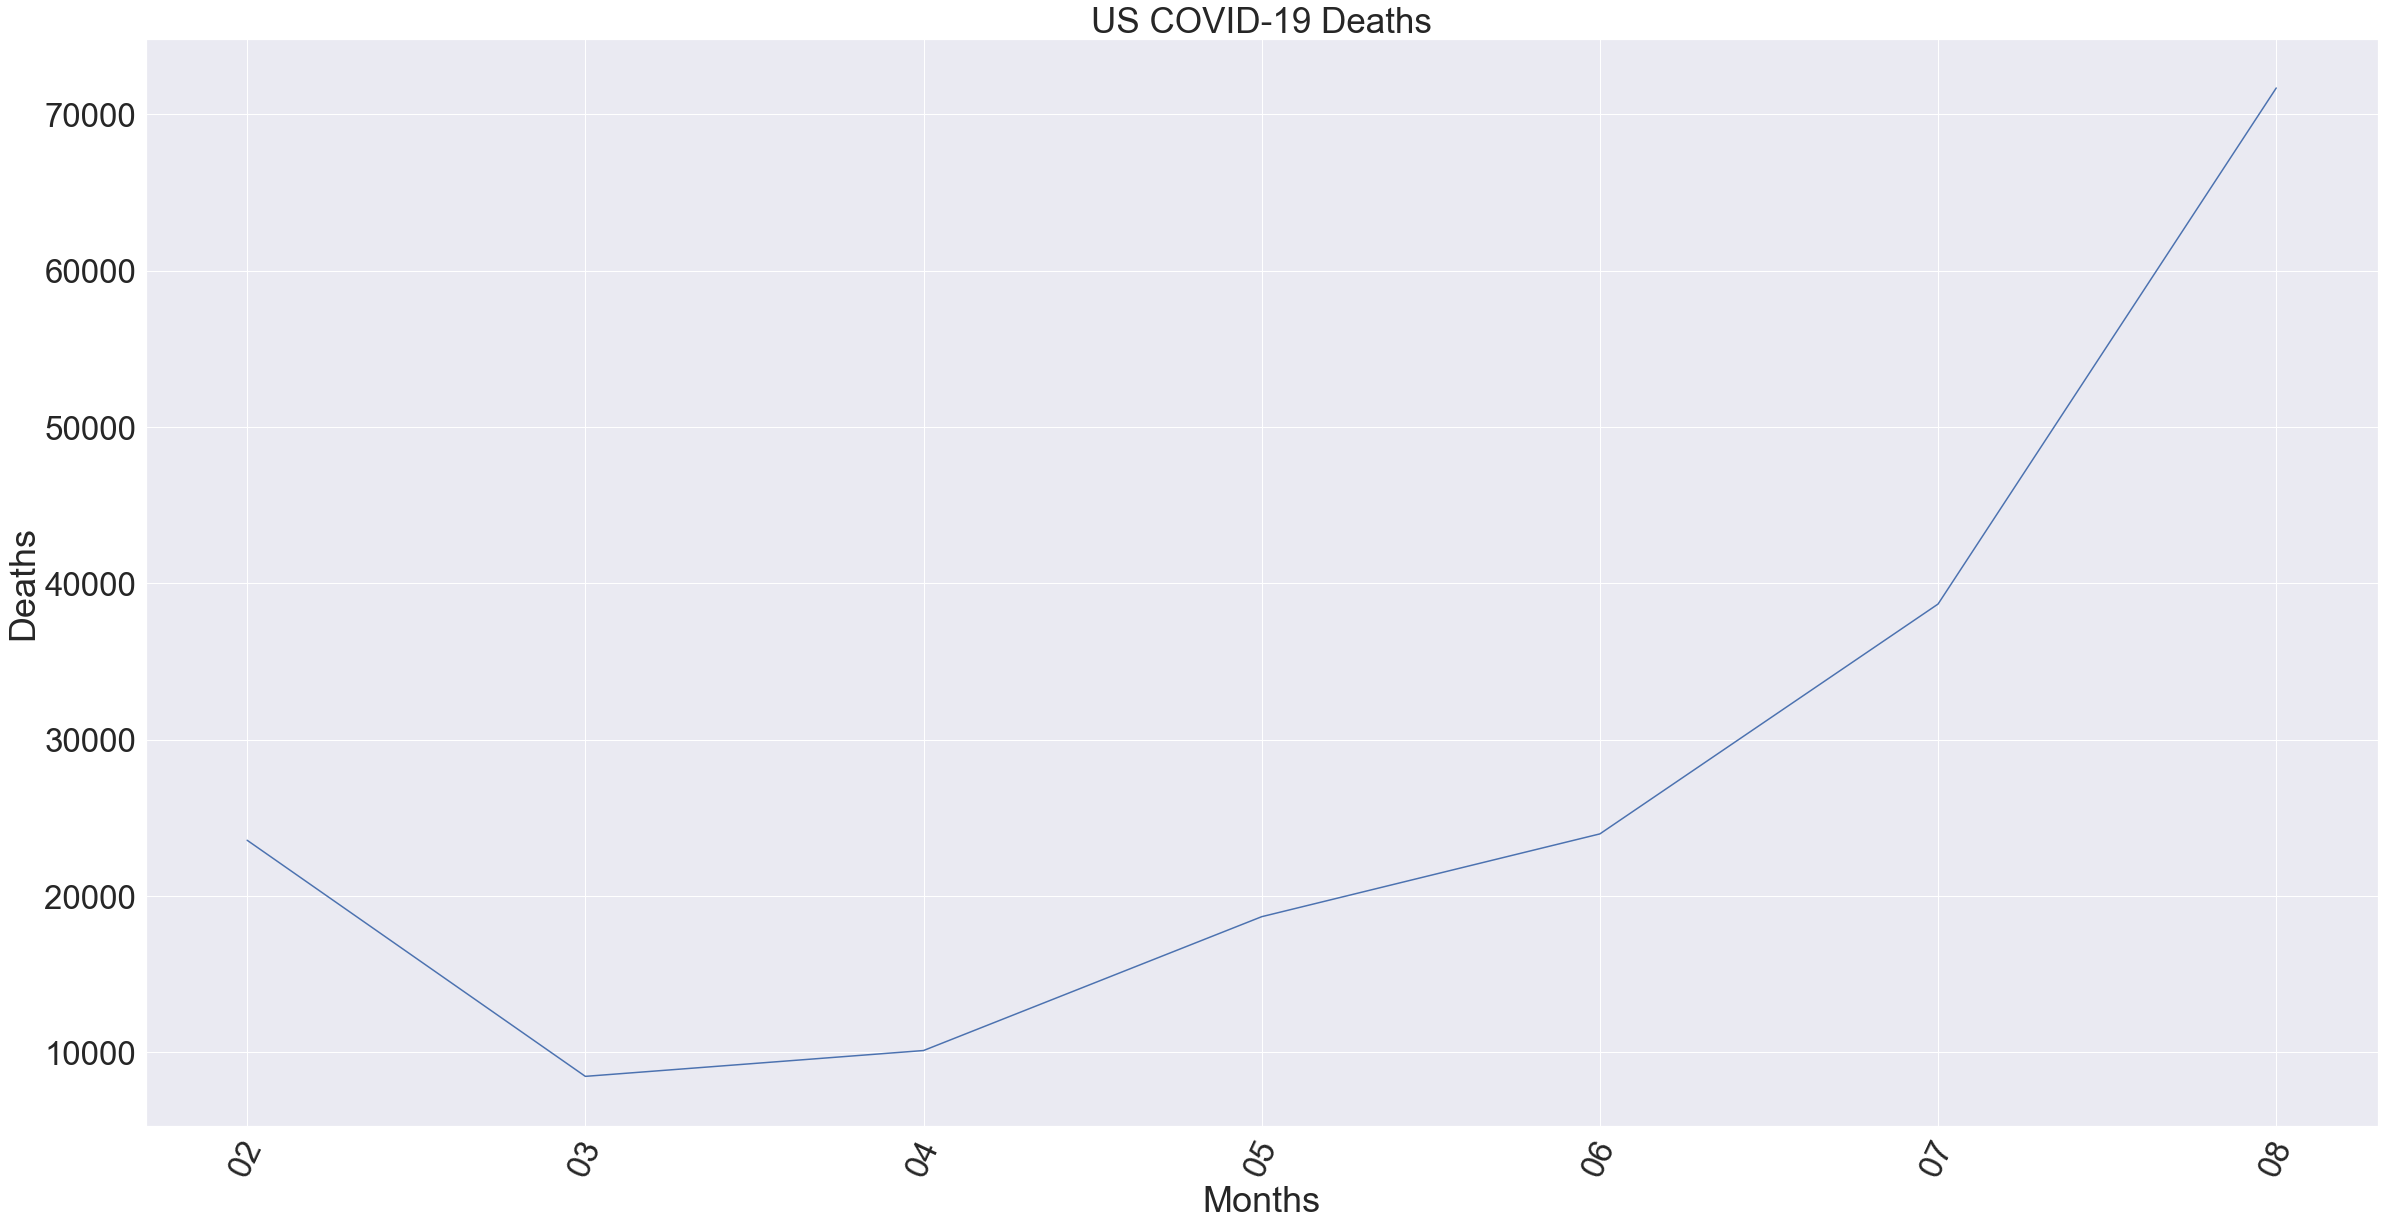

In [1799]:
sns.set(font_scale=3)
plt.figure(figsize=(40,20))
x=sns.lineplot(data=df,y='deaths',x='months',ci=None)
x.tick_params(axis='x', rotation=65)
x.set_title("US COVID-19 Deaths",fontsize=35);
x.ticklabel_format(style='plain', axis='y')
x.set_xlabel("Months")
x.set_ylabel("Deaths");

In [812]:
testURL=requests.get("https://www.census.gov/geographies/reference-files/2010/geo/state-area.html")
testURL.text
f=open("census.txt","x")
f.write(testURL.text)
f.close()

FileExistsError: [Errno 17] File exists: 'census.txt'

In [87]:
soup=BeautifulSoup(testURL.text,'html.parser')
soup


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<!--[if lt IE 9]><meta http-equiv="X-UA-Compatible" content="IE=EmulateIE8"  /><![endif]-->
<!--[if gte IE 9]><meta http-equiv="X-UA-Compatible" content="IE=edge"> <![endif]-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/etc.clientlibs/census/clientlibs/bootstrap.css" rel="stylesheet" type="text/css"/>
<link href="/etc.clientlibs/census/clientlibs/jquery.css" rel="stylesheet" type="text/css"/>
<link href="/etc.clientlibs/census/clientlibs/common-site.css" rel="stylesheet" type="text/css"/>
<link href="/etc.clientlibs/census/clientlibs/census-pattern-library.css" rel="stylesheet" type="text/css"/>
<link href="/etc.clientlibs/census/clientlibs/census-css.css" rel="stylesheet" type="text/css"/>
<link href="/etc.clientlibs/census-core/clientlibs.css" rel="stylesheet"

In [206]:
stateslst=[]
numlst=[]
findtd=soup.findAll("td")
for i in findtd:
    print(i)
    

<td><strong>Total<sup><a href="https://www.census.gov/geo/reference/state-area.html#n3">3</a></sup></strong></td>
<td><strong>3,805,927</strong></td>
<td><strong>9,857,306</strong></td>
<td><strong>3,535,932</strong></td>
<td><strong>9,158,022</strong></td>
<td><strong>269,995</strong></td>
<td><strong>699,284</strong></td>
<td><strong>85,763</strong></td>
<td><strong>222,125</strong></td>
<td><strong>42,371</strong></td>
<td><strong>109,742</strong></td>
<td><strong>60,094</strong></td>
<td><strong>155,643</strong></td>
<td><strong>81,767</strong></td>
<td><strong>211,774</strong></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><br/></td>
<td><strong>United States<sup><a href="https://www.census.gov/geo/reference/state-area.html#n4">4</a></sup></strong></td>

In [229]:
# https://www.census.gov/geographies/reference-files/2010/geo/state-area.html
test

states      ppsm    sq_mi
0   District of Columbia  11685.51       68
1             New Jersey   1207.83    8,723
2            Puerto Rico   1022.36    5,325
3          Massachusetts    883.68   10,554
4            Connecticut    734.92    5,543
5               Maryland    623.99   12,406
6               Delaware    506.32    2,489
7               New York    410.32   54,555
8                Florida    405.45   65,758
9                   Ohio    286.19   44,826
10          Pennsylvania    285.73   46,054
11            California    252.74  163,695
12              Illinois    226.73   57,914
13                Hawaii    218.89   10,932
14        North Carolina    218.04   53,819
15               Vermont    217.52    9,616
16               Indiana    188.56   36,420
17               Georgia    186.26   59,425
18              Michigan    176.31   96,714
19          Rhode Island    173.53    1,545
20          South Dakota    167.01   77,116
21         New Hampshire    152.62    9,349
22              Virginia    115.78   42,775
23              Kentucky    113.37   40,408
24             Tennessee    112.40   42,144
25         West Virginia    107.70   24,230
26             Louisiana    107.53   52,378
27               Alabama     97.18   52,420
28              Missouri     89.52   69,707
29            Washington     74.25   71,298
30             Minnesota     71.07   86,936
31                  Utah     67.63   84,897
32               Arizona     65.33  113,990
33           Mississippi     63.23   48,432
34              Arkansas     58.25   53,179
35              Oklahoma     58.03   69,899
36                  Iowa     56.64   56,273
37              Colorado     56.04  104,094
38                Oregon     44.19   98,379
39                 Maine     43.78   35,380
40                 Texas     39.54  268,596
41                Kansas     35.64   82,278
42                Nevada     28.59  110,572
43              Nebraska     25.22   77,348
44                 Idaho     22.11   83,569
45            New Mexico     17.36  121,590
46        South Carolina     11.78   32,020
47          North Dakota     11.09   70,698
48               Montana      7.42  147,040
49             Wisconsin      6.00   65,496
50               Wyoming      6.00   97,813
51                Alaska      1.28  665,384

In [1738]:
# https://www.weatherapi.com/docs/
templst=[]
humidlst=[]
count=0
city='Greenbelt'
state='Maryland'
APIkey="f4c4a1f134674a5494e182829212708"
#weather="https://api.weatherapi.com/v1/history.json?key="+APIkey+"&q=Rockville&region=Maryland&dt=2021-08-20"
while count <=6:
    weather="https://api.weatherapi.com/v1/history.json?key="+APIkey+"&q="+city+"&region="+state+"&dt=2021-08-2"+str(count)
    test=requests.get(weather)
    templst.append(test.json()['forecast']['forecastday'][0]['day']['avgtemp_f'])
    humidlst.append(test.json()['forecast']['forecastday'][0]['day']['avghumidity'])
    count+=1

In [1739]:
round(sum(templst)/len(templst),2)

81.5

In [1740]:
round(sum(humidlst)/len(humidlst),2)

76.43

In [1741]:
round(sum(lst6[-7:])/len(lst6[-7:]),2)

7.86